In [1]:
# import pandas & matplotlib define paths for CSV files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

transactionfile = 'csv_CLEAN_QVI_TransactionData.csv'
df_transaction = pd.read_csv(transactionfile)

behaviorfile = 'csv_CLEAN_QVI_PurchaseBehavior.csv'
df_behavior = pd.read_csv(behaviorfile)

# set display.max_columns
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)

In [2]:
# data already assigned to tables
# examine data
print(df_transaction.head(), '\r\n', '\r\n')
print(df_behavior.head())

         DATE  STORE_#  LOYALTY_CARD_#  TRANSACTION_ID  PRODUCT_#  \
0  10/17/2018        1            1000               1          5   
1   9/16/2018        1            1002               2         58   
2    3/7/2019        1            1003               3         52   
3    3/8/2019        1            1003               4        106   
4   11/2/2018        1            1004               5         96   

                                  PRODUCT_NAME  PRODUCT_QUANTITY  TOTAL_SALES  
0           Natural Chip Company Sea Salt 175g                 2          6.0  
1    Red Rock Deli Chicken & Garlic Aioli 150g                 1          2.7  
2         Grain Waves Sour Cream & Chives 210G                 1          3.6  
3  Natural Chip Company Honey Soy Chicken 175g                 1          3.0  
4       WoolWorths Original Stacked Chips 160g                 1          1.9   
 

   LOYALTY_CARD_#               LIFESTAGE PREMIUM_CUSTOMER
0            1000   Young Singles/Couples 

In [3]:
# examine date column
print('\r\n', df_transaction['DATE'])
# --> shows that 'DATE' column is in date format (edited in excel prior to import)


 0         10/17/2018
1          9/16/2018
2           3/7/2019
3           3/8/2019
4          11/2/2018
             ...    
264831     12/8/2018
264832     10/1/2018
264833    10/24/2018
264834    10/27/2018
264835    12/14/2018
Name: DATE, Length: 264836, dtype: object


In [4]:
# examine # of products in PRODUCT_NAME column

row_count = df_transaction['PRODUCT_NAME'].shape[0]
print('\r\n', 'Total # of rows in PRODUCT_NAME before edits:', row_count)

#row_count2 = df_transaction_nosalsa['PRODUCT_NAME'].shape[0]
#print('\r\n', '**NO SALSA DF**', '\r\n', 'Total # of rows in PRODUCT_NAME:', row_count2)


 Total # of rows in PRODUCT_NAME before edits: 264836


In [5]:
# see what product names have 'Salsa' in their name
list_productnames = df_transaction['PRODUCT_NAME'].unique()
print('\r\n', 'Total # of product names:', len(list_productnames))
salsa_counter = 0
product_name_total = ''
for product_name in list_productnames:
    if 'Salsa' in product_name:
        salsa_counter += 1
        product_name_total = product_name_total + '\r\n' + '  ' + product_name
print('\r\n', 'Product names with salsa:', salsa_counter)
print(product_name_total)
# --> we can see that 2 chip products have 'Salsa' in their description
# --> those chip products have 'Mozzarella' or 'Crinkle' in their name


 Total # of product names: 114

 Product names with salsa: 9

  Old El Paso Salsa Dip Tomato Medium 300g
  Red Rock Deli Special Reserve Salsa & Mozzarella 150g
  Doritos Salsa Medium 300g
  Old El Paso Salsa Dip Tomato Mild 300g
  WoolWorths Medium Salsa 300g
  WoolWorths Mild Salsa 300g
  Doritos Salsa Mild 300g
  Old El Paso Salsa Dip Chunky Tomato Hot 300g
  Smiths Crinkle Cut Tomato Salsa 150g


In [6]:
# find productnames with 'salsa' and remove the row UNLESS string contrains 'Mozzarella' or 'Crinkle'
condition = df_transaction['PRODUCT_NAME'].str.contains('Salsa') & \
            ((df_transaction['PRODUCT_NAME'].str.contains('Mozzarella')) |
             (df_transaction['PRODUCT_NAME'].str.contains('Crinkle')))
df_transaction = df_transaction[condition | ~df_transaction['PRODUCT_NAME'].str.contains('Salsa')]
df_transaction.reset_index(drop=True, inplace=True)

In [7]:
# verify edits worked correctly
edited1_list_productnames = df_transaction['PRODUCT_NAME'].unique()
print('\r\n', 'Total # of product names:', len(edited1_list_productnames))
salsa_counter2 = 0
product_name_total2 = ''
for product_name2 in edited1_list_productnames:
    if 'Salsa' in product_name2:
        salsa_counter2 += 1
        product_name_total2 = product_name_total2 + '\r\n' + '  ' + product_name2
print('\r\n', 'Product names with salsa:', salsa_counter2)
print(product_name_total2)


 Total # of product names: 107

 Product names with salsa: 2

  Red Rock Deli Special Reserve Salsa & Mozzarella 150g
  Smiths Crinkle Cut Tomato Salsa 150g


In [8]:
# merge df_transaction and df_behavior for analysis
df_merged = df_transaction.merge(df_behavior, on='LOYALTY_CARD_#', how='left')
# check that the loyalty card numbers aligned correctly
print(df_merged.tail())

              DATE  STORE_#  LOYALTY_CARD_#  TRANSACTION_ID  PRODUCT_#  \
249665    8/3/2018       88         2370651          240350          4   
249666   12/8/2018       88         2370701          240378         24   
249667   10/1/2018       88         2370751          240394         60   
249668  10/24/2018       88         2370961          240480         70   
249669  12/14/2018       88         2373711          241815         16   

                                    PRODUCT_NAME  PRODUCT_QUANTITY  \
249665            Doritos Corn Chip Supreme 380g                 2   
249666             Grain Waves Sweet Chilli 210g                 2   
249667  Kettle Tortilla Chips Feta & Garlic 150g                 2   
249668       Tyrrells Crisps Lightly Salted 165g                 2   
249669    Smiths Crinkle Cut Salt & Vinegar 330g                 2   

        TOTAL_SALES               LIFESTAGE PREMIUM_CUSTOMER  
249665         13.0  Midage Singles/Couples       Mainstream  
249666  

In [9]:
# summaries of data
print(df_merged.info())
# --> no nulls in data; date, prodname, lifestage, premcustomer = object totsales = float
print(df_merged.describe())
# --> TOTAL_SALES: mean = 7.29, std = 3.07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249670 entries, 0 to 249669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              249670 non-null  object 
 1   STORE_#           249670 non-null  int64  
 2   LOYALTY_CARD_#    249670 non-null  int64  
 3   TRANSACTION_ID    249670 non-null  int64  
 4   PRODUCT_#         249670 non-null  int64  
 5   PRODUCT_NAME      249670 non-null  object 
 6   PRODUCT_QUANTITY  249670 non-null  int64  
 7   TOTAL_SALES       249670 non-null  float64
 8   LIFESTAGE         249670 non-null  object 
 9   PREMIUM_CUSTOMER  249670 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 19.0+ MB
None
             STORE_#  LOYALTY_CARD_#  TRANSACTION_ID      PRODUCT_#  \
count  249670.000000    2.496700e+05    2.496700e+05  249670.000000   
mean      135.044278    1.355203e+05    1.351234e+05      56.294288   
std        76.773591    8.065746

             DATE  STORE_#  LOYALTY_CARD_#  TRANSACTION_ID  PRODUCT_#  \
898     8/17/2018        2            2373             974         69   
956     8/18/2018        2            2426            1038        108   
3543    8/19/2018        4            4258            3815        113   
3634    5/17/2019        4            4281            3916        108   
3910    5/16/2019        4            4347            4220         14   
...           ...      ...             ...             ...        ...   
246088  5/19/2019      269          269221          266380         62   
247097  8/15/2018      270          270127          267461         46   
247168  5/18/2019      270          270138          267536         87   
247400  5/20/2019      270          270173          267782         89   
249132  8/19/2018      272          272037          269678         46   

                                             PRODUCT_NAME  PRODUCT_QUANTITY  \
898             Smiths Thinly Cut Sour Cream

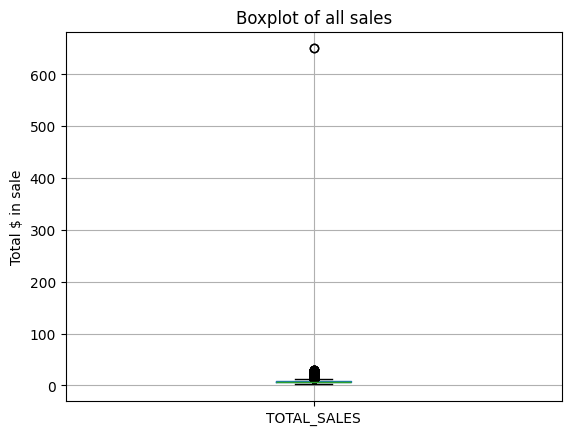

In [10]:
# check for outliers in TOTAL_SALES
df_merged.boxplot(column='TOTAL_SALES')
#print outlier values
whiskerplot_lowerbound = 13.4
outliers = df_merged[df_merged['TOTAL_SALES'] > whiskerplot_lowerbound]
print(outliers)
print(len(outliers))

plt.title('Boxplot of all sales')
plt.ylabel('Total $ in sale') 
plt.show()
# --> many of these 'outliers' have lower total_sales than we care about
# --> looking at the boxplot, the most relevant total_sales outlier is total_sales = 650

In [11]:
#inspeting the total_sales = 650 values
print(df_merged[df_merged['TOTAL_SALES'] == 650])
# --> two purchases from the same buyer

             DATE  STORE_#  LOYALTY_CARD_#  TRANSACTION_ID  PRODUCT_#  \
209007  8/19/2018      226          226000          226201          4   
209008  5/20/2019      226          226000          226210          4   

                          PRODUCT_NAME  PRODUCT_QUANTITY  TOTAL_SALES  \
209007  Doritos Corn Chip Supreme 380g               200        650.0   
209008  Doritos Corn Chip Supreme 380g               200        650.0   

             LIFESTAGE PREMIUM_CUSTOMER  
209007  Older Families          Premium  
209008  Older Families          Premium  


In [12]:
#inspecting other transactions from this buyer
print(df_merged[df_merged['LOYALTY_CARD_#'] == 226000])
# -> only two transactions so they are not a 'typical retail' customer

             DATE  STORE_#  LOYALTY_CARD_#  TRANSACTION_ID  PRODUCT_#  \
209007  8/19/2018      226          226000          226201          4   
209008  5/20/2019      226          226000          226210          4   

                          PRODUCT_NAME  PRODUCT_QUANTITY  TOTAL_SALES  \
209007  Doritos Corn Chip Supreme 380g               200        650.0   
209008  Doritos Corn Chip Supreme 380g               200        650.0   

             LIFESTAGE PREMIUM_CUSTOMER  
209007  Older Families          Premium  
209008  Older Families          Premium  


In [13]:
#remove the above customer from the data frame and check the row values to ensure
print(df_merged.iloc[209007])
remove_loyalycard_outlier = 226000
df_merged.drop(df_merged[df_merged['LOYALTY_CARD_#'] == remove_loyalycard_outlier].index,inplace=True)
print(df_merged.iloc[209007])

DATE                                     8/19/2018
STORE_#                                        226
LOYALTY_CARD_#                              226000
TRANSACTION_ID                              226201
PRODUCT_#                                        4
PRODUCT_NAME        Doritos Corn Chip Supreme 380g
PRODUCT_QUANTITY                               200
TOTAL_SALES                                  650.0
LIFESTAGE                           Older Families
PREMIUM_CUSTOMER                           Premium
Name: 209007, dtype: object
DATE                                            10/14/2018
STORE_#                                                226
LOYALTY_CARD_#                                      226002
TRANSACTION_ID                                      226213
PRODUCT_#                                               16
PRODUCT_NAME        Smiths Crinkle Cut Salt & Vinegar 330g
PRODUCT_QUANTITY                                         2
TOTAL_SALES                                      

In [14]:
#inspect transaction lines by date
#first let's just look at a list of # of transactions by date

df_merged['DATE'] = pd.to_datetime(df_merged['DATE'])
transactioncount_bydate = df_merged.groupby('DATE').size().reset_index(name='transaction_count')

dates = transactioncount_bydate['DATE']
print('Number of days with transactions occuring:', len(dates))

# **take away the comment on the below line to display the whole dataframe
#pd.set_option('display.max_rows', None)
print(transactioncount_bydate)

#below it says there are only 364 days with transactions so we need to find the day that is missing

Number of days with transactions occuring: 364
          DATE  transaction_count
0   2018-07-01                671
1   2018-07-02                662
2   2018-07-03                684
3   2018-07-04                679
4   2018-07-05                663
..         ...                ...
359 2019-06-26                670
360 2019-06-27                674
361 2019-06-28                685
362 2019-06-29                708
363 2019-06-30                706

[364 rows x 2 columns]


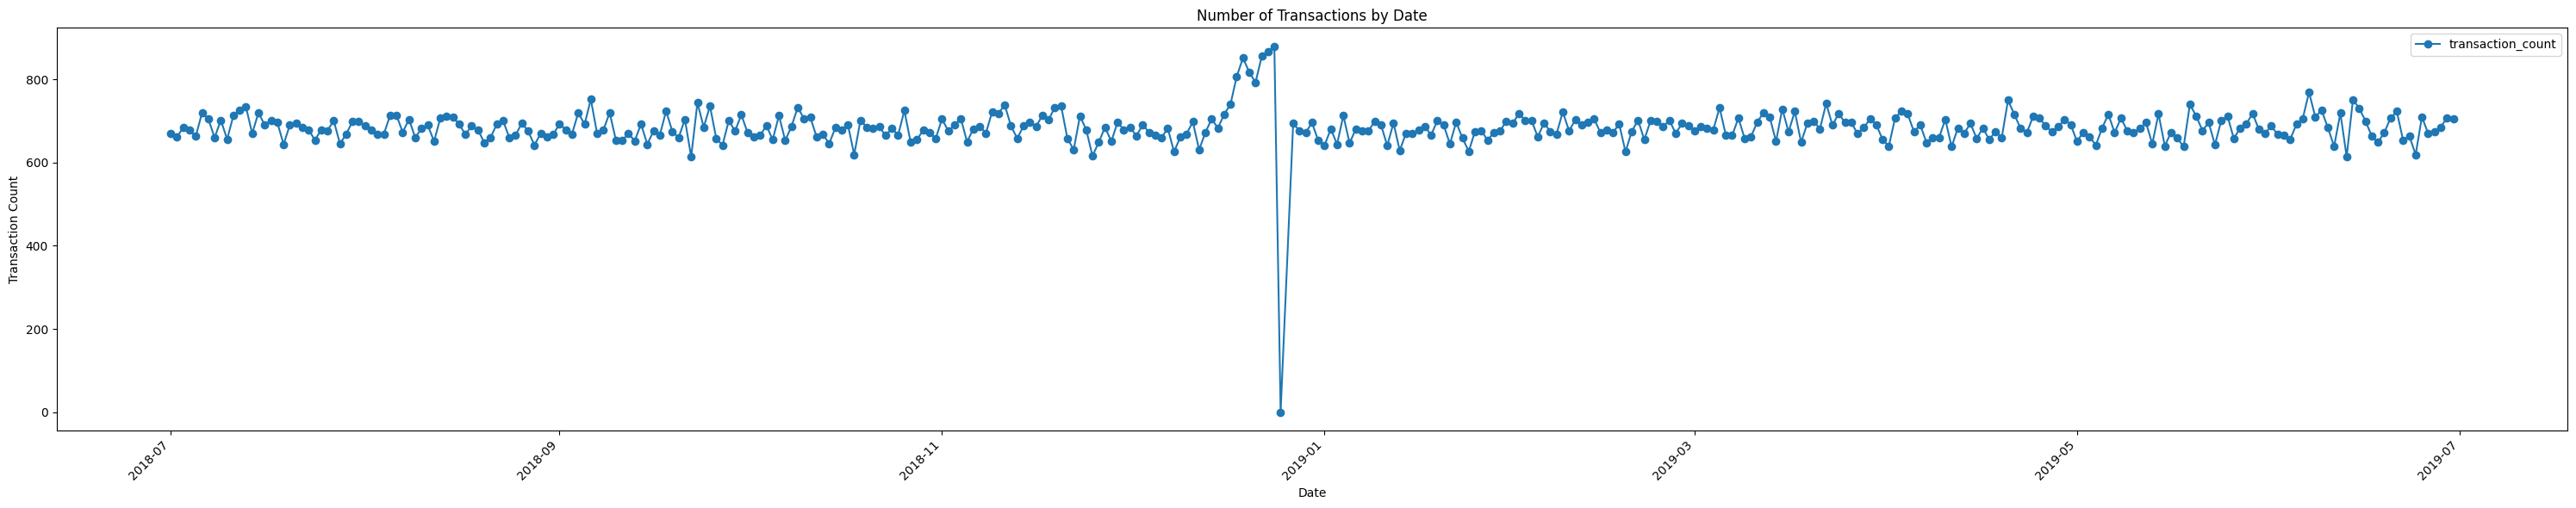

In [15]:
# add in the missing value
transactioncount_bydate = df_merged.groupby('DATE').size().reset_index(name='transaction_count')

transactioncount_bydate.at[177, 'DATE'] = '2018-12-25'
transactioncount_bydate.at[177, 'transaction_count'] = 0

# create a chart to see this in a cleaner way

transactioncount_bydate.plot(x='DATE', y='transaction_count', kind='line', marker='o', figsize=(30, 6))

plt.title('Number of Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Number of Transactions by Date')
plt.show()

In [16]:
# summaries of data after edits and cleaning
print(df_merged.info())
# --> no nulls in data; date, prodname, lifestage, premcustomer = object totsales = float
print(df_merged.describe())
# --> TOTAL_SALES: mean = 7.29, std = 3.07

<class 'pandas.core.frame.DataFrame'>
Index: 249668 entries, 0 to 249669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              249668 non-null  datetime64[ns]
 1   STORE_#           249668 non-null  int64         
 2   LOYALTY_CARD_#    249668 non-null  int64         
 3   TRANSACTION_ID    249668 non-null  int64         
 4   PRODUCT_#         249668 non-null  int64         
 5   PRODUCT_NAME      249668 non-null  object        
 6   PRODUCT_QUANTITY  249668 non-null  int64         
 7   TOTAL_SALES       249668 non-null  float64       
 8   LIFESTAGE         249668 non-null  object        
 9   PREMIUM_CUSTOMER  249668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 21.0+ MB
None
                                DATE        STORE_#  LOYALTY_CARD_#  \
count                         249668  249668.000000    2.496680e+05   
mean 

In [17]:
# quick look at what the merged data frame looks like
df_merged

,DATE,STORE_#,LOYALTY_CARD_#,TRANSACTION_ID,PRODUCT_#,PRODUCT_NAME,PRODUCT_QUANTITY,TOTAL_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt 175g,2,6.0,Young Singles/Couples,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chicken & Garlic Aioli 150g,1,2.7,Young Singles/Couples,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream & Chives 210G,1,3.6,Young Families,Budget
3,2019-03-08,1,1003,4,106,Natural Chip Company Honey Soy Chicken 175g,1,3.0,Young Families,Budget
4,2018-11-02,1,1004,5,96,WoolWorths Original Stacked Chips 160g,1,1.9,Older Singles/Couples,Mainstream
...,...,...,...,...,...,...,...,...,...,...
249665,2018-08-03,88,2370651,240350,4,Doritos Corn Chip Supreme 380g,2,13.0,Midage Singles/Couples,Mainstream
249666,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,Young Families,Mainstream
249667,2018-10-01,88,2370751,240394,60,Kettle Tortilla Chips Feta & Garlic 150g,2,9.2,Young Families,Premium
249668,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,Older Families,Budget


In [18]:
# examine frequency of pack_size, brand, transactions

In [19]:
# filter through pack size data and tally counts if the target consumer is purchasing
import re
df_affinityanalysis_brand = df_merged[['PRODUCT_NAME','PRODUCT_QUANTITY','LIFESTAGE','PREMIUM_CUSTOMER']]

# initialize general counts 
row_count = len(df_affinityanalysis_brand)
row_index = 0
count_purchaseofabrand_mainstream_youngsinglescouples = 0
count_totalpacks = 0

# initialize brand counts (if the target customer type is purchasing)
count_70 = 0
count_90 = 0
count_110 = 0
count_125 = 0
count_134 = 0
count_135 = 0
count_150 = 0
count_160 = 0
count_165 = 0
count_170 = 0
count_175 = 0
count_180 = 0
count_190 = 0
count_200 = 0
count_210 = 0
count_220 = 0
count_250 = 0
count_270 = 0
count_330 = 0
count_380 = 0

# loop through all rows in the data
for row in range(row_count):
    row = df_affinityanalysis_brand.iloc[row_index]

    # initialize the values for each column of that row
    lifestage = row['LIFESTAGE']
    type = row['PREMIUM_CUSTOMER']
    quantity = row['PRODUCT_QUANTITY']
    full_prodname = row['PRODUCT_NAME']
    pack_size = re.findall(r'\d+', full_prodname)
            
     # increase the instnaces for the brand that is present
    if '70' in pack_size:
        count_70 += quantity
    
    elif '90' in pack_size:
        count_90 += quantity

    elif '110' in pack_size:
        count_110 += quantity

    elif '125' in pack_size:
        count_125 += quantity

    elif '134' in pack_size:
        count_134 += quantity

    elif '135' in pack_size:
        count_135 += quantity

    elif '150' in pack_size:
        count_150 += quantity

    elif '160' in pack_size:
        count_160 += quantity

    elif '165' in pack_size:
        count_165 += quantity

    elif '170' in pack_size:
        count_170 += quantity

    elif '175' in pack_size:
        count_175 += quantity

    elif '180' in pack_size:
        count_180 += quantity

    elif '190' in pack_size:
        count_190 += quantity

    elif '200' in pack_size:
        count_200 += quantity

    elif '210' in pack_size:
        count_210 += quantity

    elif '220' in pack_size:
        count_220 += quantity

    elif '250' in pack_size:
        count_250 += quantity

    elif '270' in pack_size:
        count_270 += quantity

    elif '330' in pack_size:
        count_330 += quantity

    elif '380' in pack_size:
        count_380 += quantity

    # increase row_index 
    row_index += 1

    # total count to check
    count_totalpacks += quantity

# check that the sum of all brand counts is equal to the purchase of a brand total
#count_sum = count_naturalchipcompany + count_redrockdeli + count_grainwaves + count_woolworths + count_cheetos + count_infuzions + count_doritos + count_smiths + count_kettle + count_ccs + count_tostitos + count_cobs + count_burgerrings + count_thins + count_tyrrells + count_cheezels + count_twisties + count_sunbites + count_pringles + count_frenchfries
#print('Total instances for a purchase of a brand for the target consumer: \n', count_sum)

print(f'Total number of packs: {count_totalpacks}')
count_sum_packsize = count_70 + count_90 + count_110 + count_125 + count_134 + count_135 + count_150 + count_160 + count_165 + count_170 + count_175 + count_180 + count_190 + count_200 + count_210 + count_220 + count_250 + count_270 + count_330 + count_380 
print(f'Sum of counts: {count_sum_packsize}')

list_packsizecounts = [count_70, count_90, count_110, count_125, count_134, count_135, count_150, count_160, count_165, count_170 ,count_175, count_180, count_190, count_200, count_210, count_220, count_250, count_270, count_330, count_380]

Total number of packs: 475911
Sum of counts: 475911


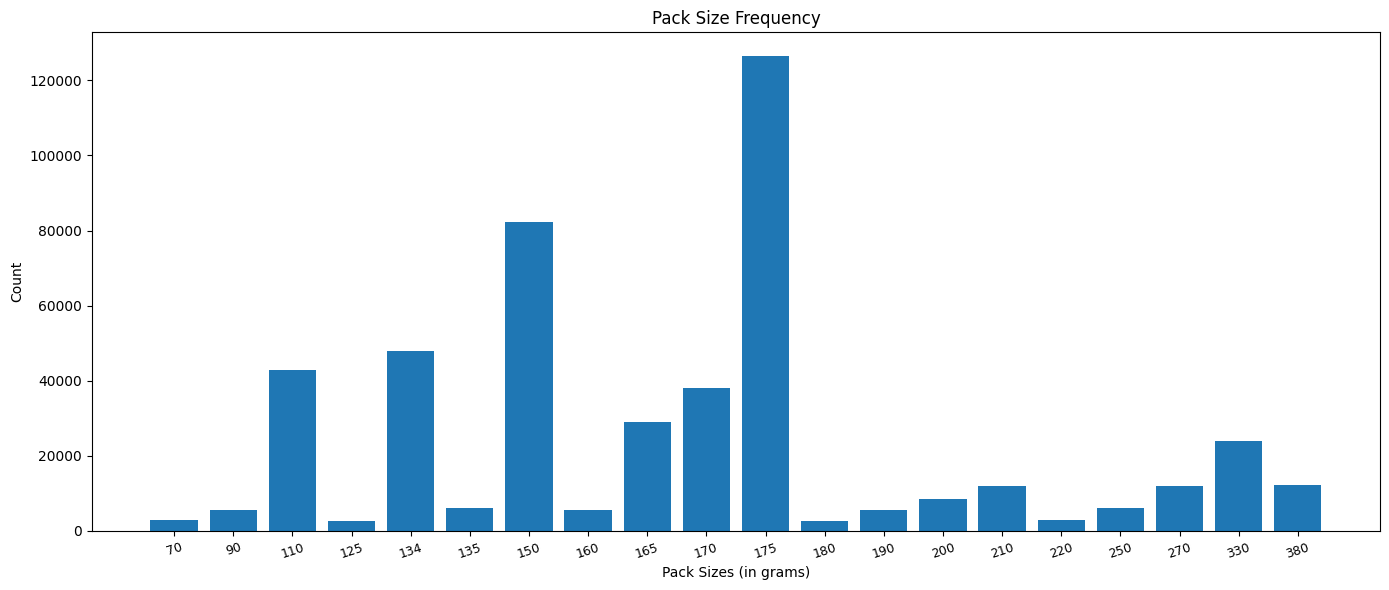

In [20]:
# plot pack size frequency
plt.figure(figsize=(14, 6))

plt.bar(range(len(list_packsizecounts)), list_packsizecounts)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], \
           ['70', '90', '110', '125', '134', '135', '150', '160', '165', '170', '175', '180', '190', '200', '210', '220',\
           '250', '270', '330', '380'], \
           rotation=18, fontsize=9)
plt.title('Pack Size Frequency')
plt.ylabel('Count')
plt.xlabel('Pack Sizes (in grams)')

plt.tight_layout()
plt.savefig('Pack Size Frequency')
plt.show()

In [21]:
# filter through brand data and tally counts if the target consumer is purchasing
df_affinityanalysis_brand = df_merged[['PRODUCT_NAME','PRODUCT_QUANTITY','LIFESTAGE','PREMIUM_CUSTOMER']]

# initialize general counts 
row_count = len(df_affinityanalysis_brand)
row_index = 0
count_total = 0

# initialize brand counts (if the target customer type is purchasing)
count_naturalchipcompany = 0
count_redrockdeli = 0
count_grainwaves = 0
count_woolworths = 0
count_cheetos = 0
count_infuzions = 0
count_doritos = 0
count_smiths = 0
count_kettle = 0
count_ccs = 0
count_tostitos = 0
count_cobs = 0
count_burgerrings = 0
count_thins = 0
count_tyrrells = 0
count_cheezels = 0
count_twisties = 0
count_sunbites = 0
count_pringles = 0
count_frenchfries = 0

# loop through all values in the data
for row in range(row_count):
    row = df_affinityanalysis_brand.iloc[row_index]

    # initialize the values for each column of that row
    lifestage = row['LIFESTAGE']
    type = row['PREMIUM_CUSTOMER']
    prod_quantity = row['PRODUCT_QUANTITY']
    instances = prod_quantity
    full_prodname = row['PRODUCT_NAME']
    split_prodname = full_prodname.split(' ')
    check_prodname = split_prodname[0]
            
     # increase the instnaces for the brand that is present
    if 'Natural' == check_prodname:
        count_naturalchipcompany += instances

    elif 'Red' == check_prodname :
        count_redrockdeli += instances

    elif 'Grain' == check_prodname :
        count_grainwaves += instances

    elif 'WoolWorths' == check_prodname :
        count_woolworths += instances

    elif 'Cheetos' == check_prodname :
        count_cheetos += instances

    elif 'Infuzions' == check_prodname :
        count_infuzions += instances

    elif 'Doritos' == check_prodname :
        count_doritos += instances
        
    elif 'Smiths' == check_prodname :
        count_smiths += instances

    elif 'CCs' == check_prodname :
        count_ccs += instances

    elif 'Tostitos' == check_prodname:
        count_tostitos += instances

    elif 'Cobs' == check_prodname :
        count_cobs += instances

    elif 'Burger' == check_prodname :
        count_burgerrings += instances

    elif 'Thins' == check_prodname :
        count_thins += instances

    elif 'Tyrrells' == check_prodname :
        count_tyrrells += instances

    elif 'Cheezels' == check_prodname :
        count_cheezels += instances

    elif 'Twisties' == check_prodname :
        count_twisties += instances

    elif 'SunBites' == check_prodname :
        count_sunbites += instances

    elif 'Pringles' == check_prodname :
        count_pringles += instances

    elif 'French' == check_prodname :
        count_frenchfries += instances

    elif 'Kettle' == check_prodname :
        count_kettle += instances
        
        #print(count_kettle)
        #if instances > 1:
            #print(count_kettle)
        
    # add the number of instances to the total
    count_total += instances

    # increase row_index 
    row_index += 1

# check that the sum of all brand counts is equal to the purchase of a brand total
count_sum = count_naturalchipcompany + count_redrockdeli + count_grainwaves + count_woolworths + count_cheetos + count_infuzions + count_doritos + count_smiths + count_kettle + count_ccs + count_tostitos + count_cobs + count_burgerrings + count_thins + count_tyrrells + count_cheezels + count_twisties + count_sunbites + count_pringles + count_frenchfries
print(f'Total instances for a purchase of a brand for the target consumer: \n{count_sum}')

list_brandcounts = [count_naturalchipcompany, count_redrockdeli, count_grainwaves, count_woolworths, count_cheetos, count_infuzions, count_doritos, count_smiths, count_ccs, count_tostitos, count_cobs, count_burgerrings, count_thins, count_tyrrells, count_cheezels, count_twisties, count_sunbites, count_pringles, count_frenchfries, count_kettle]
#for value in list_brandcounts:
    #print(value)

Total instances for a purchase of a brand for the target consumer: 
475911


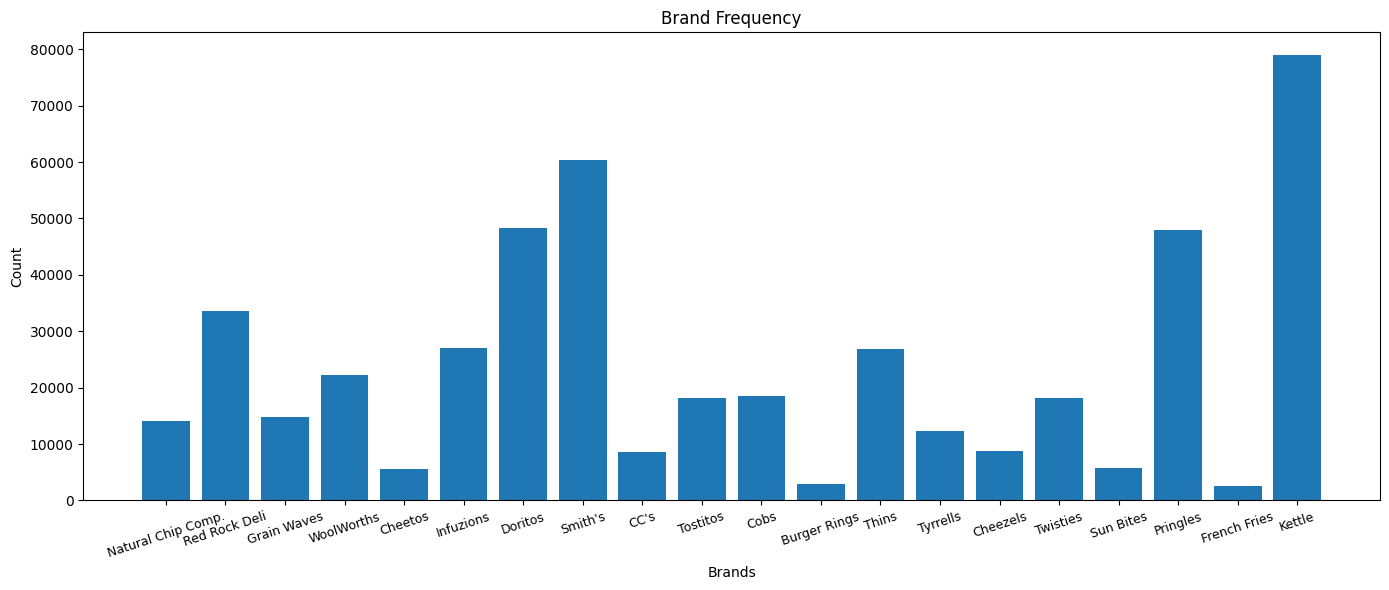

In [22]:
# plot brand size frequency
plt.figure(figsize=(14, 6))

plt.bar(range(len(list_brandcounts)), list_brandcounts)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], \
           ['Natural Chip Comp.', 'Red Rock Deli', 'Grain Waves', 'WoolWorths', 'Cheetos', \
            'Infuzions', 'Doritos', "Smith's", "CC's", 'Tostitos', 'Cobs', 'Burger Rings', 'Thins', \
            'Tyrrells', 'Cheezels', 'Twisties', 'Sun Bites', 'Pringles', 'French Fries', 'Kettle'], \
           rotation=18, fontsize=9)
plt.title('Brand Frequency')
plt.ylabel('Count')
plt.xlabel('Brands')

plt.tight_layout()
plt.savefig('Brand Frequency')
plt.show()

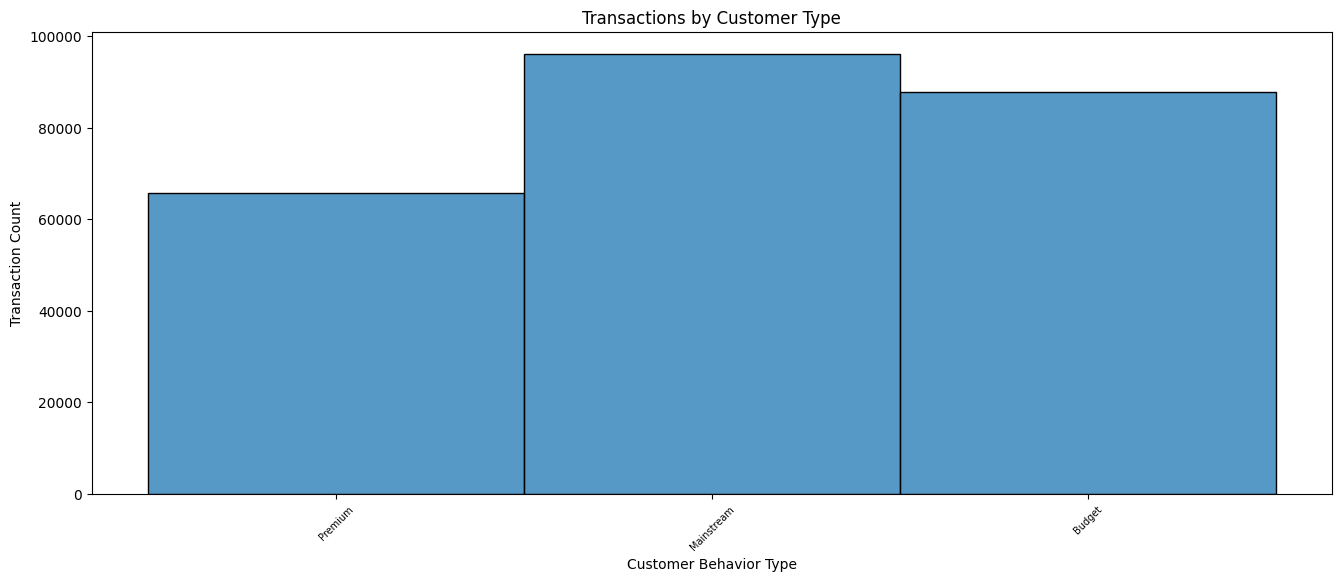

In [23]:
# transactions by customer type data and plot
df_customertype = df_merged['PREMIUM_CUSTOMER']

plt.figure(figsize=(16, 6))
           
sns.histplot(data=df_customertype,binwidth=5)

plt.xticks(rotation=45, fontsize=7)
plt.title('Transactions by Customer Type')
plt.xlabel('Customer Behavior Type')
plt.ylabel('Transaction Count')

plt.savefig('Transactions by Consumer Type', bbox_inches='tight')
plt.show()

In [24]:
#** remove necessary comments below to run code
# organize data to interpret number of customers by lifestage

df_type_lifestage = df_merged[['LOYALTY_CARD_#','LIFESTAGE', 'PREMIUM_CUSTOMER']]

row_count = len(df_type_lifestage)
row_index = 0
all_ids = []
customer_type = []
customer_lifestage = []

#for row in range(row_count):
 #   row = df_type_lifestage.iloc[row_index]
 #   loyalty_id = row['LOYALTY_CARD_#']
 #   all_ids.append(loyalty_id)

  #  type = row['PREMIUM_CUSTOMER']
#    lifestage = row['LIFESTAGE']

#    if all_ids.count(loyalty_id) == 1:
      #  customer_type.append(type)
      #  customer_lifestage.append(lifestage)
        
   # row_index += 1

#data = {
    #'Customer Type': customer_type,
    #'Customer Lifestage': customer_lifestage
#}

#lifestage_type_instances = pd.DataFrame(data)

import pickle
#with open('lifestage_type_instances', 'wb') as file:
    #pickle.dump(lifestage_type_instances, file)

# save the data as a pickle file to reduce run time

# open pickle file
file = open('lifestage_type_instances', 'rb')
df_lifestage_type_instances = pickle.load(file)

print('Done')

Done


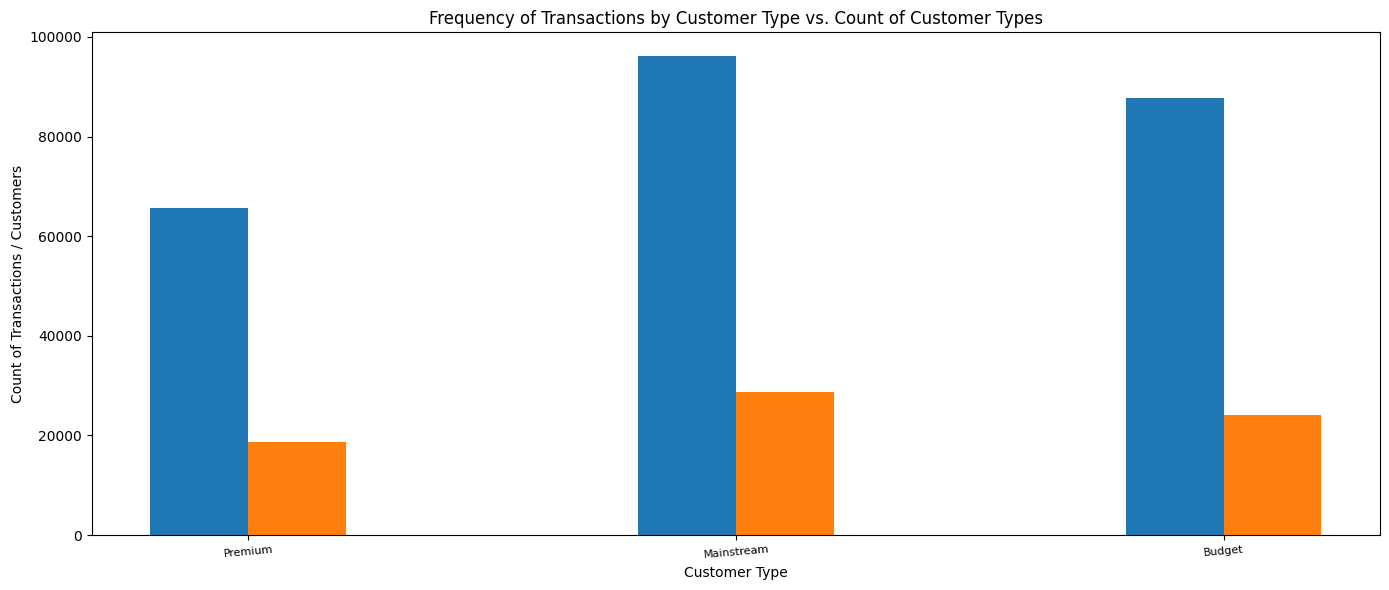

In [25]:
# reset data frames as needed
df_customertype = df_merged['PREMIUM_CUSTOMER']

plt.figure(figsize=(14, 6))

plt.hist([df_customertype, df_lifestage_type_instances['Customer Type']], bins=5)

plt.xticks([0.2,1,1.8], rotation=5, fontsize=8)
plt.title('Frequency of Transactions by Customer Type vs. Count of Customer Types')
plt.ylabel('Count of Transactions / Customers')
plt.xlabel('Customer Type')

plt.tight_layout()
plt.savefig('Frequency of Customer Types vs Transactions by Type')
plt.show()

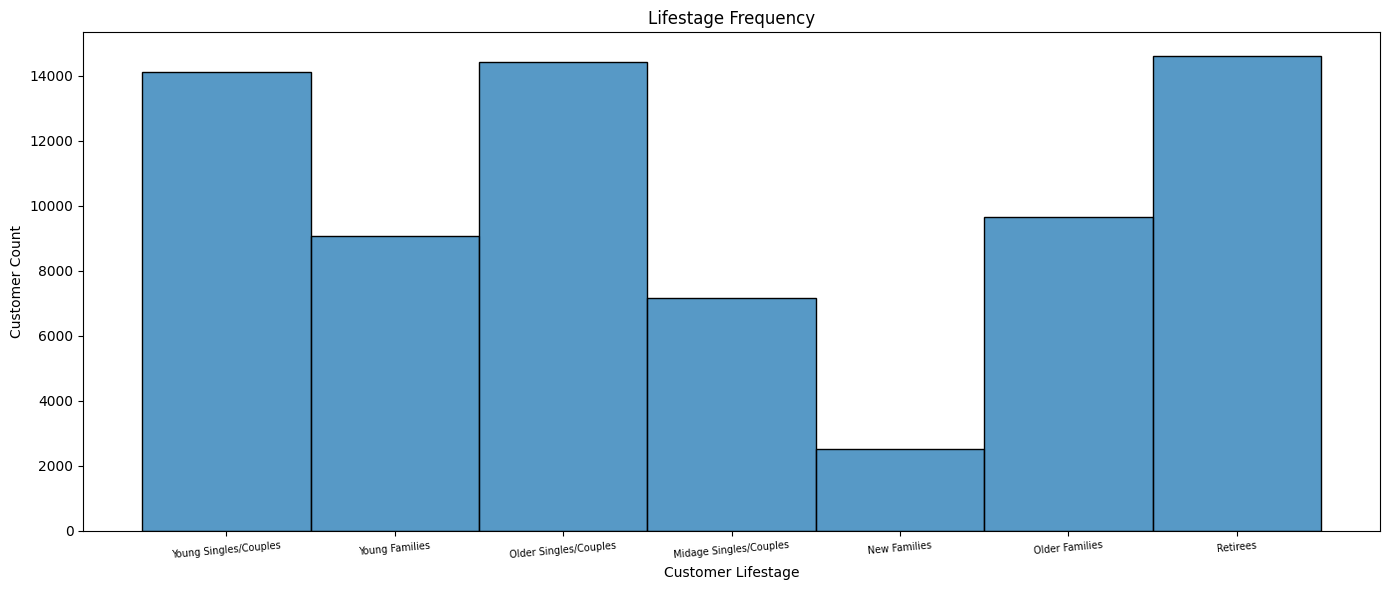

In [27]:
#visualize the customer lifestage counts
plt.figure(figsize=(14, 6))
           
sns.histplot(data=df_lifestage_type_instances['Customer Lifestage'])

plt.xticks(rotation=5, fontsize=7)
plt.title('Lifestage Frequency')
plt.ylabel('Customer Count')
plt.xlabel('Customer Lifestage')

plt.tight_layout()
plt.savefig('Lifestage Frequency')
plt.show()

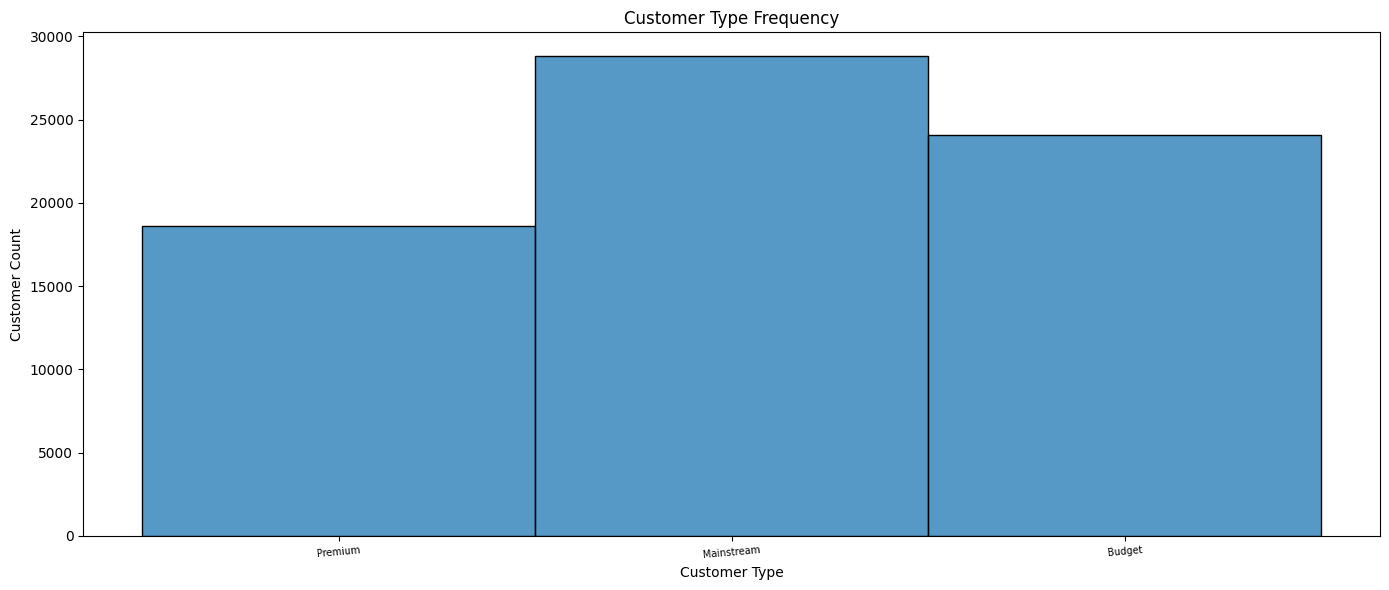

In [28]:
#visualize the customer type counts
plt.figure(figsize=(14, 6))
           
sns.histplot(data=df_lifestage_type_instances['Customer Type'])

plt.xticks(rotation=5, fontsize=7)
plt.title('Customer Type Frequency')
plt.ylabel('Customer Count')
plt.xlabel('Customer Type')

plt.tight_layout()
plt.savefig('Customer Type Frequency')
plt.show()

In [29]:
# next we will examins sales in different consumer categories

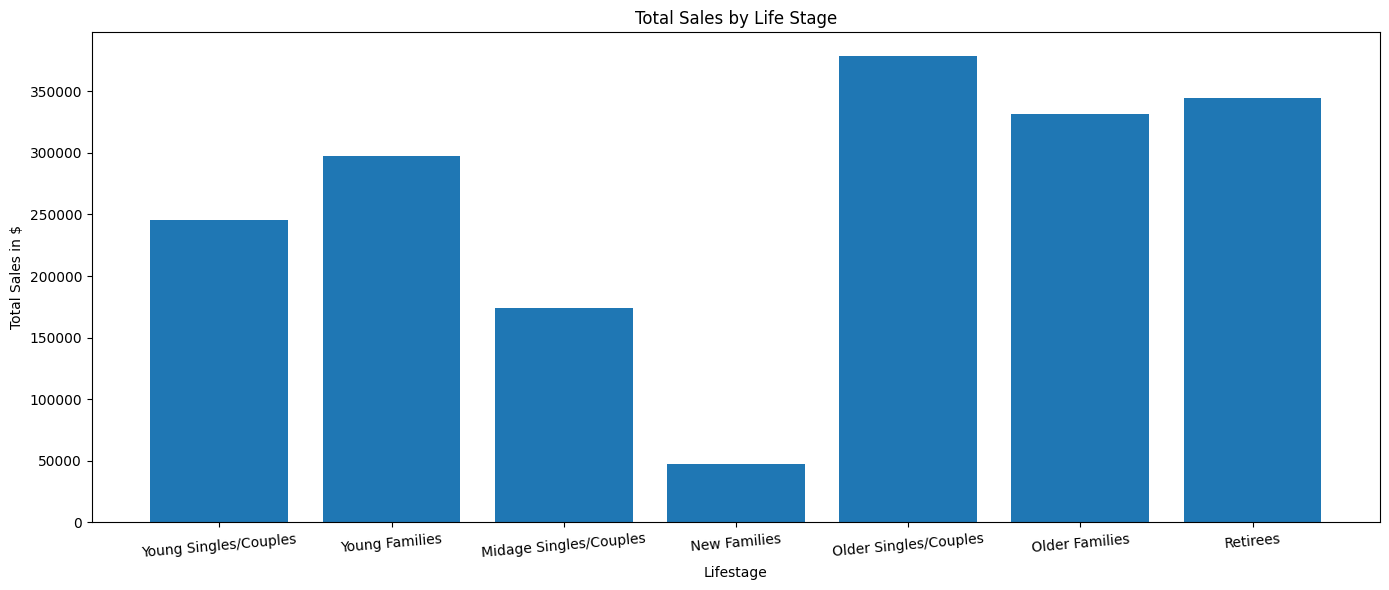

In [30]:
# total sales by lifestage

df_lifestage_sales = df_merged[['TOTAL_SALES','LIFESTAGE']]

young_singlescouples = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'Young Singles/Couples']['TOTAL_SALES'].sum()
young_families = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'Young Families']['TOTAL_SALES'].sum()
midage_singlescouples = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'Midage Singles/Couples']['TOTAL_SALES'].sum()
new_families = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'New Families']['TOTAL_SALES'].sum()
older_singlescouples = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'Older Singles/Couples']['TOTAL_SALES'].sum()
older_families = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'Older Families']['TOTAL_SALES'].sum()
retirees = df_lifestage_sales[df_lifestage_sales['LIFESTAGE'] == 'Retirees']['TOTAL_SALES'].sum()

data = {
    'Lifestage': ['Young Singles/Couples', 'Young Families',
 'Midage Singles/Couples', 'New Families', 'Older Singles/Couples', 'Older Families', 'Retirees'],
    'Total_Sales': [young_singlescouples, young_families, midage_singlescouples, new_families, older_singlescouples, older_families, retirees]
}

df_lifestagesales2 = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

plt.bar(df_lifestagesales2['Lifestage'], df_lifestagesales2['Total_Sales'])

plt.xticks(rotation=5)
plt.title('Total Sales by Life Stage')
plt.ylabel('Total Sales in $')
plt.xlabel('Lifestage')

plt.tight_layout()
plt.savefig('Total Sales by Lifestage')
plt.show()

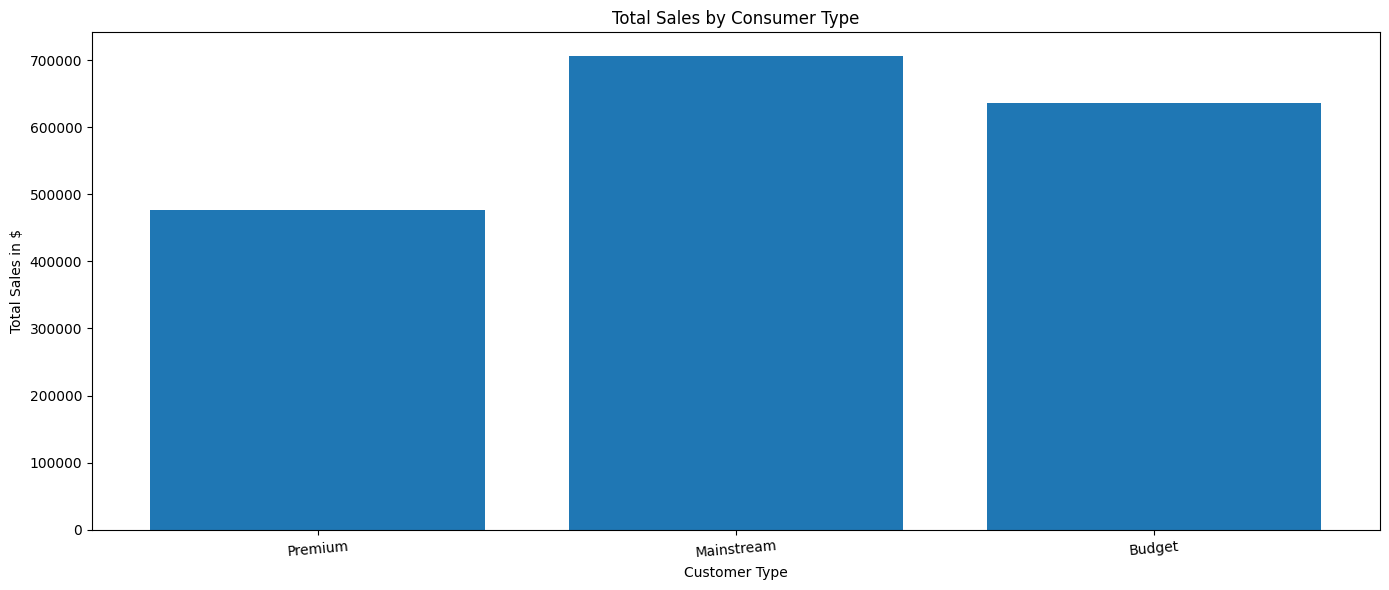

In [31]:
# total sales by customer type

df_customertypesales = df_merged[['TOTAL_SALES','PREMIUM_CUSTOMER']]

premium = df_customertypesales[df_customertypesales['PREMIUM_CUSTOMER'] == 'Premium']['TOTAL_SALES'].sum()
mainstream = df_customertypesales[df_customertypesales['PREMIUM_CUSTOMER'] == 'Mainstream']['TOTAL_SALES'].sum()
budget = df_customertypesales[df_customertypesales['PREMIUM_CUSTOMER'] == 'Budget']['TOTAL_SALES'].sum()

data = {
    'Customer Type': ['Premium', 'Mainstream', 'Budget'],
    'Total Sales': [premium, mainstream, budget]
}

df_customertypesales2 = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

plt.bar(df_customertypesales2['Customer Type'], df_customertypesales2['Total Sales'])

plt.xticks(rotation=5)
plt.title('Total Sales by Consumer Type')
plt.ylabel('Total Sales in $')
plt.xlabel('Customer Type')

plt.tight_layout()
plt.savefig('Total Sales by Customer Type')
plt.show()

In [64]:
# filter through brand data and tally counts if the target consumer is purchasing
df_sales_brand_filtering = df_merged[['PRODUCT_NAME','TOTAL_SALES']]

# initialize general counts 
row_count = len(df_sales_brand_filtering)
row_index = 0
count_total = 0

# initialize brand counts (if the target customer type is purchasing)
sales_naturalchipcompany = 0
sales_redrockdeli = 0
sales_grainwaves = 0
sales_woolworths = 0
sales_cheetos = 0
sales_infuzions = 0
sales_doritos = 0
sales_smiths = 0
sales_kettle = 0
sales_ccs = 0
sales_tostitos = 0
sales_cobs = 0
sales_burgerrings = 0
sales_thins = 0
sales_tyrrells = 0
sales_cheezels = 0
sales_twisties = 0
sales_sunbites = 0
sales_pringles = 0
sales_frenchfries = 0

# loop through all values in the data
for row in range(row_count):
    row = df_sales_brand_filtering.iloc[row_index]

    # initialize the values for each column of that row
    full_prodname = row['PRODUCT_NAME']
    split_prodname = full_prodname.split(' ')
    check_prodname = split_prodname[0]

    row_total = row['TOTAL_SALES']
            
     # increase the instnaces for the brand that is present
    if 'Natural' == check_prodname:
        sales_naturalchipcompany += row_total

    elif 'Red' == check_prodname :
        sales_redrockdeli += row_total

    elif 'Grain' == check_prodname :
        sales_grainwaves += row_total

    elif 'WoolWorths' == check_prodname :
        sales_woolworths += row_total

    elif 'Cheetos' == check_prodname :
        sales_cheetos += row_total

    elif 'Infuzions' == check_prodname :
        sales_infuzions += row_total

    elif 'Doritos' == check_prodname :
        sales_doritos += row_total
        
    elif 'Smiths' == check_prodname :
        sales_smiths += row_total

    elif 'CCs' == check_prodname :
        sales_ccs += row_total

    elif 'Tostitos' == check_prodname:
        sales_tostitos += row_total

    elif 'Cobs' == check_prodname :
        sales_cobs += row_total

    elif 'Burger' == check_prodname :
        sales_burgerrings += row_total

    elif 'Thins' == check_prodname :
        sales_thins += row_total

    elif 'Tyrrells' == check_prodname :
        sales_tyrrells += row_total

    elif 'Cheezels' == check_prodname :
        sales_cheezels += row_total

    elif 'Twisties' == check_prodname :
        sales_twisties += row_total

    elif 'SunBites' == check_prodname :
        sales_sunbites += row_total

    elif 'Pringles' == check_prodname :
        sales_pringles += row_total

    elif 'French' == check_prodname :
        sales_frenchfries += row_total

    elif 'Kettle' == check_prodname :
        sales_kettle += row_total

    # increase row_index 
    row_index += 1

list_allbrandsales = [sales_naturalchipcompany, sales_redrockdeli, sales_grainwaves, sales_woolworths, sales_cheetos, sales_infuzions, sales_doritos, sales_smiths, sales_ccs, sales_tostitos, sales_cobs, sales_burgerrings, sales_thins, sales_tyrrells, sales_cheezels, sales_twisties, sales_sunbites, sales_pringles, sales_frenchfries, sales_kettle]

print('Sales for bottom four brands', (sales_frenchfries + sales_sunbites + sales_burgerrings + sales_cheetos))

print('Sales for top four brands', (sales_kettle + sales_pringles + sales_smiths + sales_doritos))

Sales for bottom four brands 41320.90000000011
Sales for top four brands 1018885.3999998353


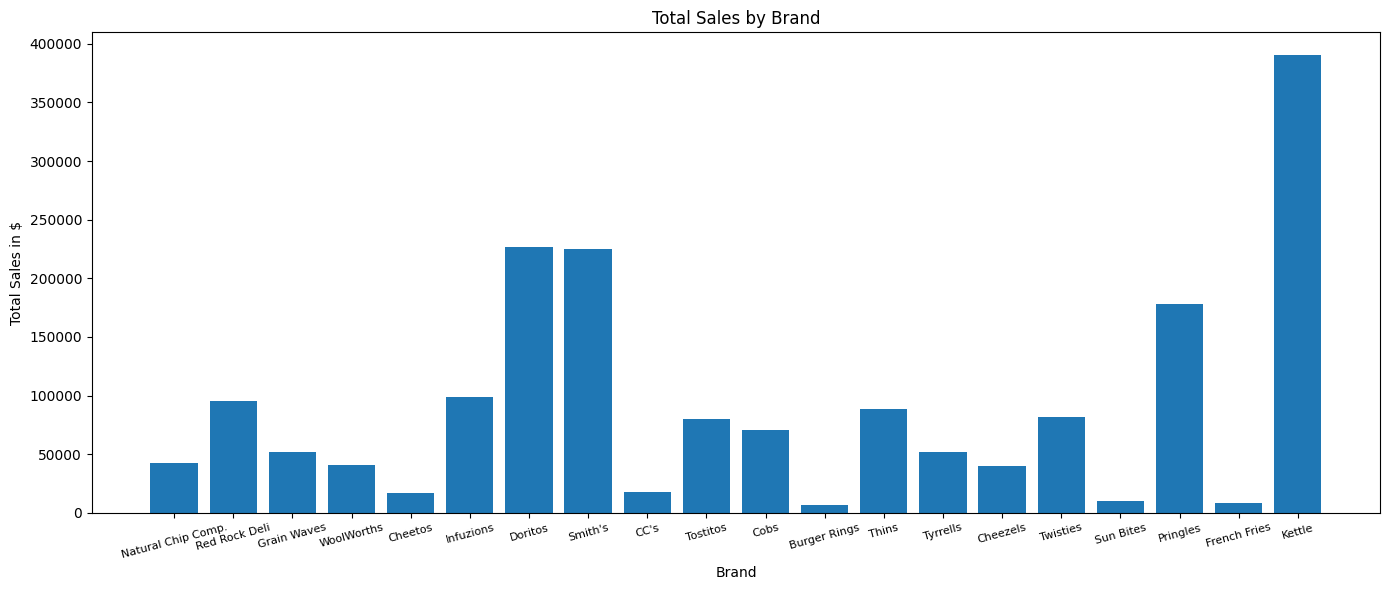

In [62]:
# total sales by brand

df_sales_prodname = df_merged[['TOTAL_SALES','PRODUCT_NAME']]


data = {
    'Brand': ['Natural Chip Comp.', 'Red Rock Deli', 'Grain Waves', 'WoolWorths', 'Cheetos', \
            'Infuzions', 'Doritos', "Smith's", "CC's", 'Tostitos', 'Cobs', 'Burger Rings', 'Thins', \
            'Tyrrells', 'Cheezels', 'Twisties', 'Sun Bites', 'Pringles', 'French Fries', 'Kettle'],
    'Sales': [sales_naturalchipcompany, sales_redrockdeli, sales_grainwaves, sales_woolworths, \
               sales_cheetos, sales_infuzions, sales_doritos, sales_smiths, sales_ccs, sales_tostitos, \
               sales_cobs, sales_burgerrings, sales_thins, sales_tyrrells, sales_cheezels, sales_twisties, \
               sales_sunbites, sales_pringles, sales_frenchfries, sales_kettle]
}

df_brand_sales = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

plt.bar(df_brand_sales['Brand'], df_brand_sales['Sales'])

plt.xticks(rotation=15, fontsize=8)
plt.title('Total Sales by Brand')
plt.ylabel('Total Sales in $')
plt.xlabel('Brand')

plt.tight_layout()
plt.savefig('Total Sales by Brand')
plt.show()

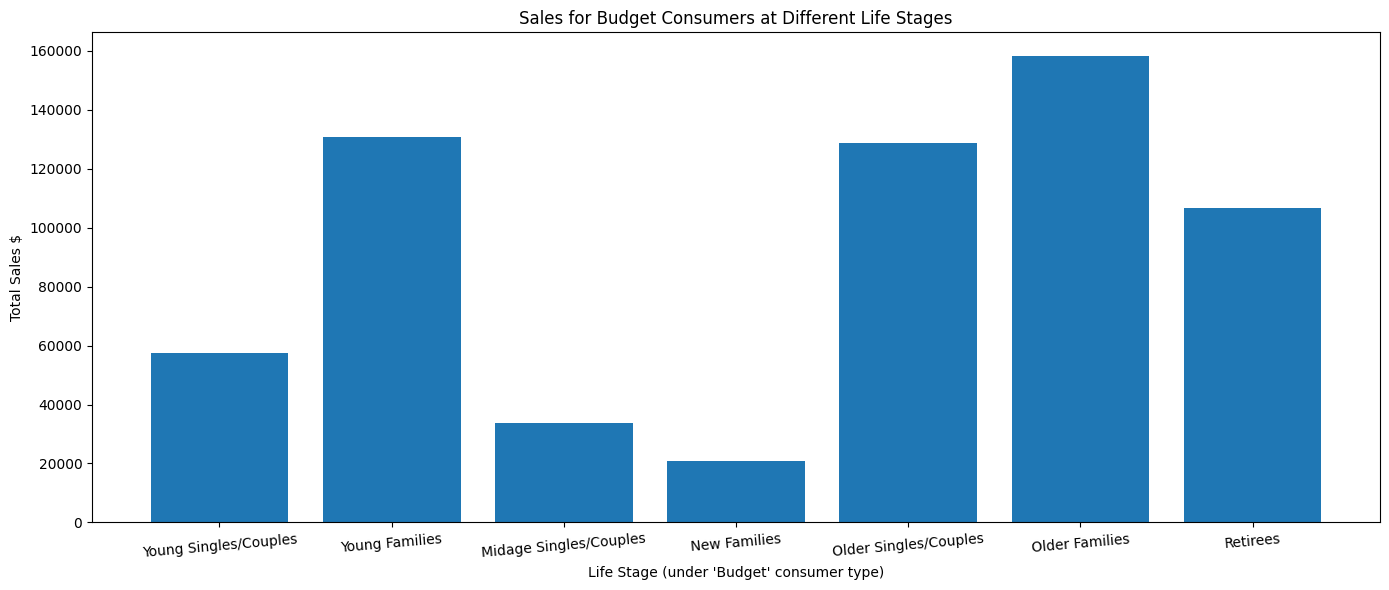

In [32]:
# total sales by budget and lifestage

df_sales_lifestage_type = df_merged[['TOTAL_SALES','LIFESTAGE','PREMIUM_CUSTOMER']]

young_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Young Singles/Couples')
    ]['TOTAL_SALES'].sum()

young_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Young Families')
    ]['TOTAL_SALES'].sum()

midage_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Midage Singles/Couples')
    ]['TOTAL_SALES'].sum()

new_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'New Families')
    ]['TOTAL_SALES'].sum()

older_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Older Singles/Couples')
    ]['TOTAL_SALES'].sum()

older_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Older Families')
    ]['TOTAL_SALES'].sum()

retirees = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Budget') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Retirees')
    ]['TOTAL_SALES'].sum()

data = {
    'Lifestage': ['Young Singles/Couples', 'Young Families',
 'Midage Singles/Couples', 'New Families', 'Older Singles/Couples', 'Older Families', 'Retirees'],
    'Total_Sales': [young_singlescouples, young_families, midage_singlescouples, new_families, older_singlescouples, older_families, retirees]
}

df_sales_lifestage_budget = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

plt.bar(df_sales_lifestage_budget['Lifestage'], df_sales_lifestage_budget['Total_Sales'])

plt.xticks(rotation=5)
plt.title('Sales for Budget Consumers at Different Life Stages')
plt.ylabel('Total Sales $')
plt.xlabel("Life Stage (under 'Budget' consumer type)")

plt.tight_layout()
plt.savefig('Sales for Budget Consumers at Different Life Stages')
plt.show()

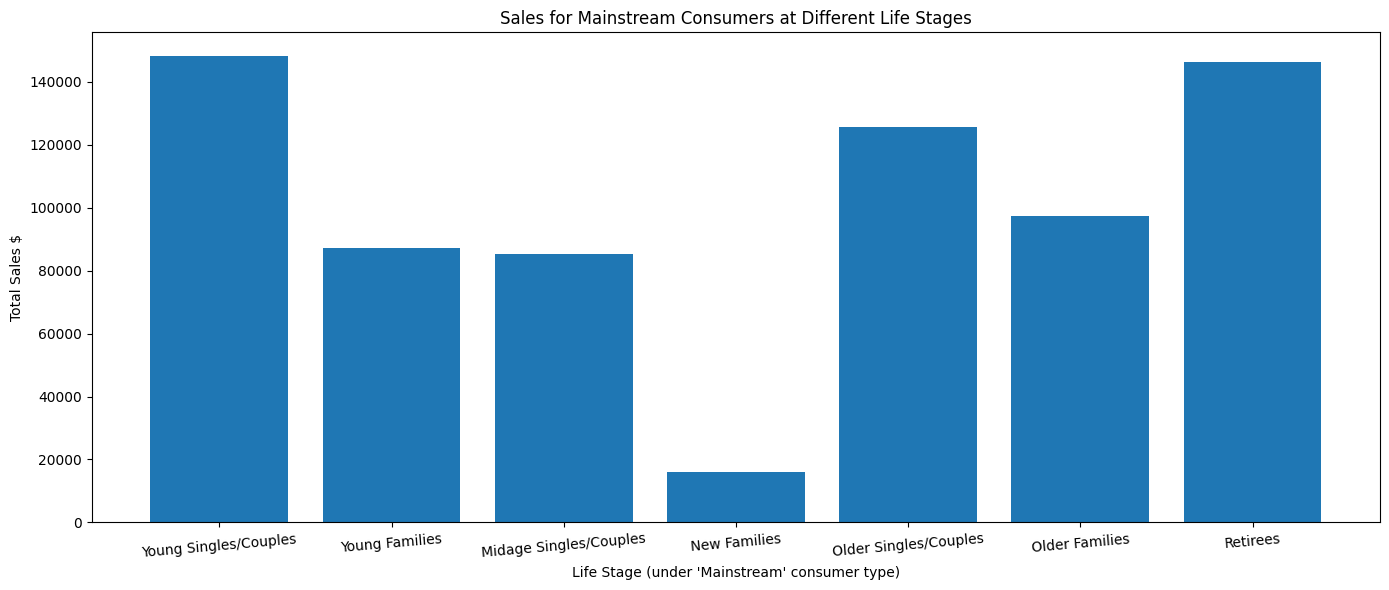

In [33]:
# total sales by mainstream and lifestage

df_sales_lifestage_type = df_merged[['TOTAL_SALES','LIFESTAGE','PREMIUM_CUSTOMER']]

young_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Young Singles/Couples')
    ]['TOTAL_SALES'].sum()

young_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Young Families')
    ]['TOTAL_SALES'].sum()

midage_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Midage Singles/Couples')
    ]['TOTAL_SALES'].sum()

new_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'New Families')
    ]['TOTAL_SALES'].sum()

older_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Older Singles/Couples')
    ]['TOTAL_SALES'].sum()

older_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Older Families')
    ]['TOTAL_SALES'].sum()

retirees = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Mainstream') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Retirees')
    ]['TOTAL_SALES'].sum()

data = {
    'Lifestage': ['Young Singles/Couples', 'Young Families',
 'Midage Singles/Couples', 'New Families', 'Older Singles/Couples', 'Older Families', 'Retirees'],
    'Total_Sales': [young_singlescouples, young_families, midage_singlescouples, new_families, older_singlescouples, older_families, retirees]
}

df_sales_lifestage_mainstream = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

plt.bar(df_sales_lifestage_mainstream['Lifestage'], df_sales_lifestage_mainstream['Total_Sales'])

plt.xticks(rotation=5)
plt.title('Sales for Mainstream Consumers at Different Life Stages')
plt.ylabel('Total Sales $')
plt.xlabel("Life Stage (under 'Mainstream' consumer type)")

plt.tight_layout()
plt.savefig('Sales for Mainstream Consumers at Different Life Stages')
plt.show()

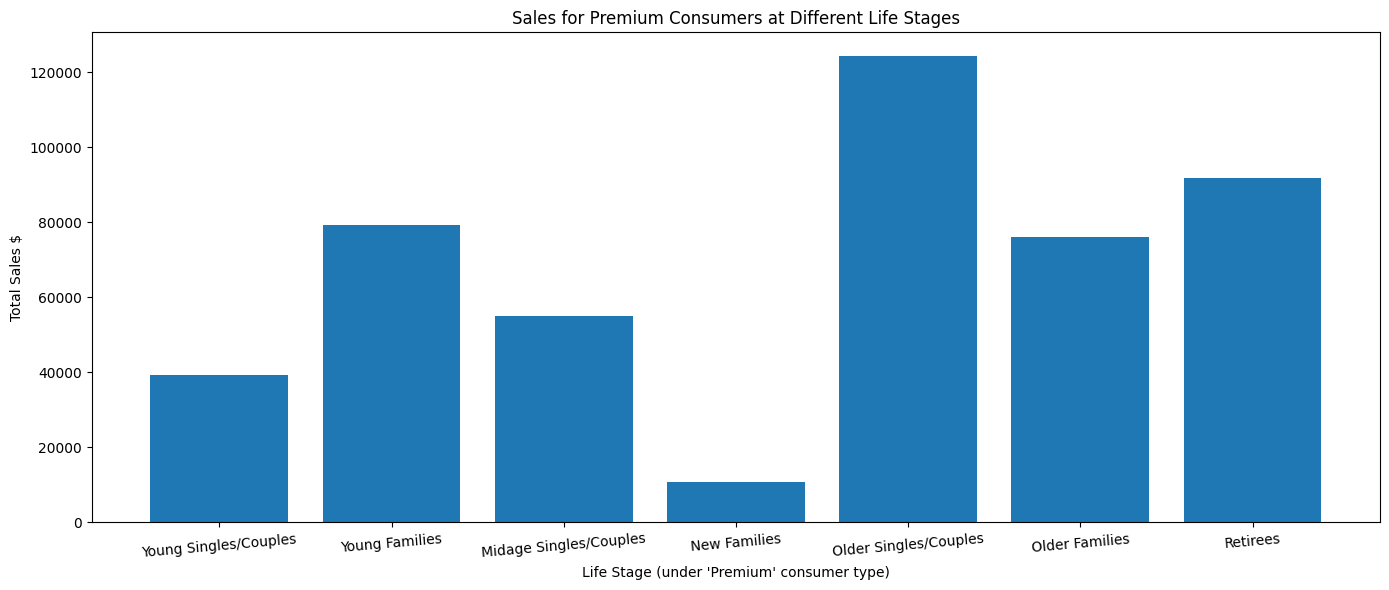

In [34]:
# total sales by premium and lifestage

df_sales_lifestage_type = df_merged[['TOTAL_SALES','LIFESTAGE','PREMIUM_CUSTOMER']]

young_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Young Singles/Couples')
    ]['TOTAL_SALES'].sum()

young_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Young Families')
    ]['TOTAL_SALES'].sum()

midage_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Midage Singles/Couples')
    ]['TOTAL_SALES'].sum()

new_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'New Families')
    ]['TOTAL_SALES'].sum()

older_singlescouples = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Older Singles/Couples')
    ]['TOTAL_SALES'].sum()

older_families = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Older Families')
    ]['TOTAL_SALES'].sum()

retirees = df_sales_lifestage_type[
    (df_sales_lifestage_type['PREMIUM_CUSTOMER'] == 'Premium') & 
    (df_sales_lifestage_type['LIFESTAGE'] == 'Retirees')
    ]['TOTAL_SALES'].sum()

# store as a data frame
data = {
    'Lifestage': ['Young Singles/Couples', 'Young Families',
 'Midage Singles/Couples', 'New Families', 'Older Singles/Couples', 'Older Families', 'Retirees'],
    'Total_Sales': [young_singlescouples, young_families, midage_singlescouples, new_families, older_singlescouples, older_families, retirees]
}

df_sales_lifestage_premium = pd.DataFrame(data)

# plot
plt.figure(figsize=(14, 6))

plt.bar(df_sales_lifestage_premium['Lifestage'], df_sales_lifestage_premium['Total_Sales'])

plt.xticks(rotation=5)
plt.title('Sales for Premium Consumers at Different Life Stages')
plt.ylabel('Total Sales $')
plt.xlabel("Life Stage (under 'Premium' consumer type)")

plt.tight_layout()
plt.savefig('Sales for Premium Consumers at Different Life Stages')
plt.show()

In [35]:
# examining different averages: number of units purchased by cateogory, price per unit by category

In [36]:
# find the average number of units bought by lifestage and customertype

# build necessary data frame
df_customertype = df_merged[['LOYALTY_CARD_#', 'PRODUCT_QUANTITY', 'PREMIUM_CUSTOMER', 'LIFESTAGE']]

# initialize general counts and sum counts
row_count = len(df_customertype)
row_index = 0
all_loyalties = []
sum1 = 0; sum2 = 0; sum3 = 0; sum4 = 0; sum5 = 0; sum6 = 0; sum7 = 0; sum8 = 0; sum9 = 0; sum10 = 0
count1 = 0; count2 = 0; count3 = 0; count4 = 0; count5 = 0; count6 = 0; count7 = 0; count8= 0; count9 = 0; count10 = 0

# loop through all rows in the data frame 
for row in range(row_count):
    # set values for each row
    row = df_customertype.iloc[row_index]
    loyalty_id = row['LOYALTY_CARD_#']
    all_loyalties.append(loyalty_id)

    units = row['PRODUCT_QUANTITY']
    type = row['PREMIUM_CUSTOMER']
    lifestage = row['LIFESTAGE']

    # add values to the correct counts
    if lifestage == 'Young Singles/Couples':
        sum1 += units
        count1 += 1

    elif lifestage == 'Young Families':
        sum2 += units
        count2 += 1

    elif lifestage == 'Midage Singles/Couples':
        sum3 += units
        count3 += 1

    elif lifestage == 'New Families':
        sum4 += units
        count4 += 1

    elif lifestage == 'Older Singles/Couples':
        sum5 += units
        count5 += 1

    elif lifestage == 'Older Families':
        sum6 += units
        count6 += 1

    elif lifestage == 'Retirees':
        sum7 += units
        count7 += 1

    if type == 'Premium':
        sum8 += units
        count8 += 1

    elif type == 'Mainstream':
        sum9 += units
        count9 += 1

    elif type == 'Budget':
        sum10 += units
        count10 += 1

    row_index += 1

# take the averages
unitaverage_youngsinglescouples = sum1/count1
unitaverage_youngfamilies = sum2/count2
unitaverage_midagesinglescouples = sum3/count3
unitaverage_newfamilies = sum4/count4
unitaverage_oldersinglescouples = sum5/count5
unitaverage_olderfamilies = sum6/count6
unitaverage_retirees = sum7/count7
unitaverage_premium = sum8/count8
unitaverage_mainstream = sum9/count9
unitaverage_budget = sum10/count10

# display answers
print('unitaverage_youngsinglescouples =', unitaverage_youngsinglescouples)
print('unitaverage_youngfamilies =', unitaverage_youngfamilies)
print('unitaverage_midagesinglescouples =', unitaverage_midagesinglescouples)
print('unitaverage_newfamilies =', unitaverage_newfamilies)
print('unitaverage_oldersinglescouples =', unitaverage_oldersinglescouples)
print('unitaverage_olderfamilies =', unitaverage_olderfamilies)
print('unitaverage_retirees =', unitaverage_retirees)
print('unitaverage_premium =', unitaverage_premium)
print('unitaverage_mainstream =', unitaverage_mainstream)
print('unitaverage_budget =', unitaverage_budget)

# build a data frame of results to be plotted
data = {
    'Labels': ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 'New Families', 'Older Singles/Couples', 'Older Families', 'Retirees', 'Premium', 'Mainstream', 'Budget'],
    'Averages': [unitaverage_youngsinglescouples, unitaverage_youngfamilies, unitaverage_midagesinglescouples, unitaverage_newfamilies, unitaverage_oldersinglescouples, unitaverage_olderfamilies, unitaverage_retirees, unitaverage_premium, unitaverage_mainstream, unitaverage_budget]
}
unit_averages = pd.DataFrame(data)

unitaverage_youngsinglescouples = 1.8329009880789298
unitaverage_youngfamilies = 1.9403436091141708
unitaverage_midagesinglescouples = 1.9011814345991562
unitaverage_newfamilies = 1.857055775678147
unitaverage_oldersinglescouples = 1.9131670657866557
unitaverage_olderfamilies = 1.9463563858844095
unitaverage_retirees = 1.892423403076661
unitaverage_premium = 1.906943134450969
unitaverage_mainstream = 1.9018851043465597
unitaverage_budget = 1.9102969981323736


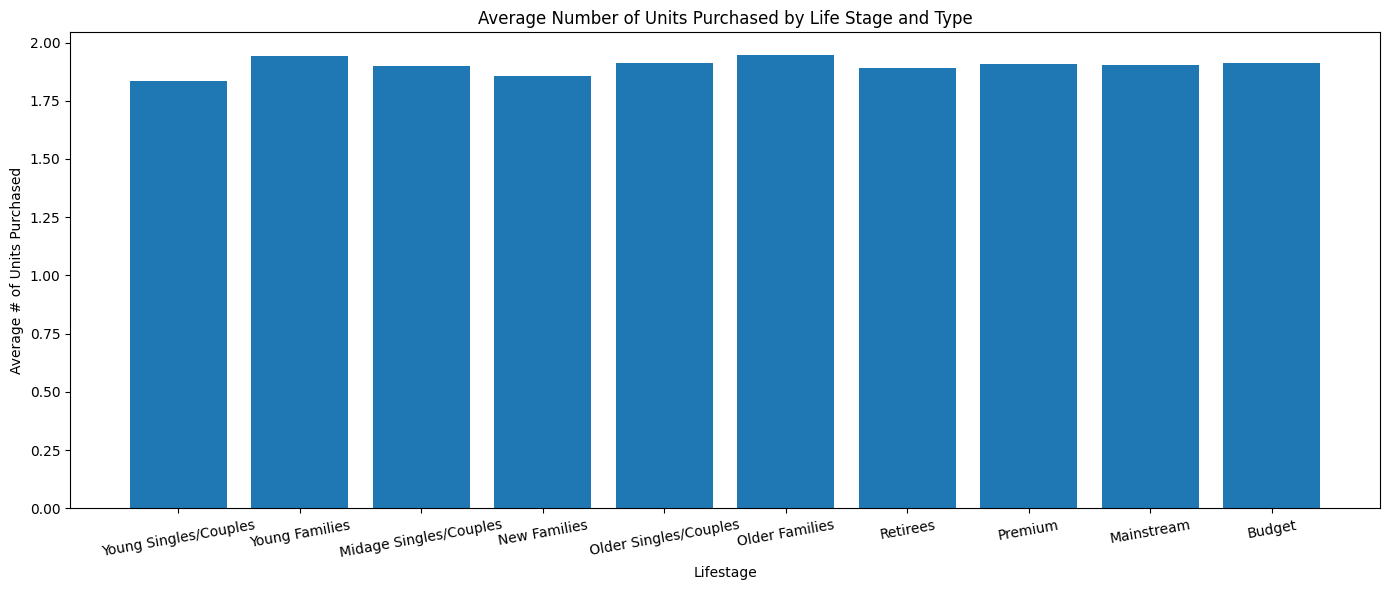

In [37]:
# plot average number of units by high level segments
plt.figure(figsize=(14, 6))

plt.bar(unit_averages['Labels'], unit_averages['Averages'])

plt.xticks(rotation=10)
plt.title('Average Number of Units Purchased by Life Stage and Type')
plt.ylabel('Average # of Units Purchased')
plt.xlabel('Lifestage')

plt.tight_layout()
plt.savefig('Average Number of Units Purchased by Life Stage and Type')
plt.show()

In [38]:
# find the average price per unit bought by categories

# build necessary data frames
df_customertype = df_merged[['LOYALTY_CARD_#', 'PRODUCT_QUANTITY', 'TOTAL_SALES', 'PREMIUM_CUSTOMER', 'LIFESTAGE']]

# initialize general counts and sum counts
row_count = len(df_customertype)
row_index = 0

sum1 = 0; sum2 = 0; sum3 = 0; sum4 = 0; sum5 = 0; sum6 = 0; sum7 = 0; sum8 = 0; sum9 = 0; sum10 = 0; sum11 = 0; sum12 = 0; sum13 = 0; sum14 = 0; sum15 = 0; sum16 = 0; sum17 = 0;
sum18 = 0; sum19 = 0; sum20 = 0; sum21 = 0; sum22 = 0; sum23 = 0; sum24 = 0; sum25 = 0; sum26 = 0; sum27 = 0; sum28 = 0; sum29 = 0; sum30 = 0; sum31= 0

count1 = 0; count2 = 0; count3 = 0; count4 = 0; count5 = 0; count6 = 0; count7 = 0; count8= 0; count9 = 0; count10 = 0; count11 = 0; count12 = 0; count13 = 0;
count14 = 0; count15 = 0; count16 = 0; count17 = 0; count18 = 0; count19 = 0; count20 = 0; count21 = 0; count22 = 0; count23 = 0; count24 = 0; count25 = 0;
count26 = 0; count27 = 0; count28 = 0; count29 = 0; count30 = 0; count31 = 0

# loop through all rows in the data
for row in range(row_count):
    # set values for each row
    row = df_customertype.iloc[row_index]
    loyalty_id = row['LOYALTY_CARD_#']
    all_loyalties.append(loyalty_id)

    units = row['PRODUCT_QUANTITY']
    total_price = row['TOTAL_SALES']
    avg_price = total_price / units
    type = row['PREMIUM_CUSTOMER']
    lifestage = row['LIFESTAGE']

    # add values to the correct counts
    if lifestage == 'Young Singles/Couples':
        sum1 += avg_price
        count1 += 1
    elif lifestage == 'Young Families':
        sum2 += avg_price
        count2 += 1
    elif lifestage == 'Midage Singles/Couples':
        sum3 += avg_price
        count3 += 1
    elif lifestage == 'New Families':
        sum4 += avg_price
        count4 += 1
    elif lifestage == 'Older Singles/Couples':
        sum5 += avg_price
        count5 += 1
    elif lifestage == 'Older Families':
        sum6 += avg_price
        count6 += 1
    elif lifestage == 'Retirees':
        sum7 += avg_price
        count7 += 1

    if type == 'Premium':
        sum8 += avg_price
        count8 += 1
    elif type == 'Mainstream':
        sum9 += avg_price
        count9 += 1
    elif type == 'Budget':
        sum10 += avg_price
        count10 += 1

    if type == 'Premium' and lifestage == 'Young Singles/Couples':
        sum11 += avg_price
        count11 += 1
    elif type == 'Premium' and lifestage == 'Young Families':
        sum12 += avg_price
        count12 += 1
    elif type == 'Premium' and lifestage == 'Midage Singles/Couples':
        sum13 += avg_price
        count13 += 1
    elif type == 'Premium' and lifestage == 'New Families':
        sum14 += avg_price
        count14 += 1
    elif type == 'Premium' and lifestage == 'Older Singles/Couples':
        sum15 += avg_price
        count15 += 1
    elif type == 'Premium' and lifestage == 'Older Families':
        sum16 += avg_price
        count16 += 1
    elif type == 'Premium' and lifestage == 'Retirees':
        sum17 += avg_price
        count17 += 1

    if type == 'Mainstream' and lifestage == 'Young Singles/Couples':
        sum18 += avg_price
        count18 += 1
    elif type == 'Mainstream' and lifestage == 'Young Families':
        sum19 += avg_price
        count19 += 1
    elif type == 'Mainstream' and lifestage == 'Midage Singles/Couples':
        sum20 += avg_price
        count20 += 1
    elif type == 'Mainstream' and lifestage == 'New Families':
        sum21 += avg_price
        count21 += 1
    elif type == 'Mainstream' and lifestage == 'Older Singles/Couples':
        sum22 += avg_price
        count22 += 1
    elif type == 'Mainstream' and lifestage == 'Older Families':
        sum23 += avg_price
        count23 += 1
    elif type == 'Mainstream' and lifestage == 'Retirees':
        sum24 += avg_price
        count24 += 1

    if type == 'Budget' and lifestage == 'Young Singles/Couples':
        sum25 += avg_price
        count25 += 1
    elif type == 'Budget' and lifestage == 'Young Families':
        sum26 += avg_price
        count26 += 1
    elif type == 'Budget' and lifestage == 'Midage Singles/Couples':
        sum27 += avg_price
        count27 += 1
    elif type == 'Budget' and lifestage == 'New Families':
        sum28 += avg_price
        count28 += 1
    elif type == 'Budget' and lifestage == 'Older Singles/Couples':
        sum29 += avg_price
        count29 += 1
    elif type == 'Budget' and lifestage == 'Older Families':
        sum30 += avg_price
        count30 += 1
    elif type == 'Budget' and lifestage == 'Retirees':
        sum31 += avg_price
        count31 += 1
        
    row_index += 1

# take life stage averages and store in a list
princeaverage_lifestage = []
priceaverage_youngsinglescouples = sum1/count1
princeaverage_lifestage.append(priceaverage_youngsinglescouples)
priceaverage_youngfamilies = sum2/count2
princeaverage_lifestage.append(priceaverage_youngfamilies)
priceaverage_midagesinglescouples = sum3/count3
princeaverage_lifestage.append(priceaverage_midagesinglescouples)
priceaverage_newfamilies = sum4/count4
princeaverage_lifestage.append(priceaverage_newfamilies)
priceaverage_oldersinglescouples = sum5/count5
princeaverage_lifestage.append(priceaverage_oldersinglescouples)
priceaverage_olderfamilies = sum6/count6
princeaverage_lifestage.append(priceaverage_olderfamilies)
priceaverage_retirees = sum7/count7
princeaverage_lifestage.append(priceaverage_retirees)

# take type averages and store in a list
priceaverage_type = []
priceaverage_premium = sum8/count8
priceaverage_type.append(priceaverage_premium)
priceaverage_mainstream = sum9/count9
priceaverage_type.append(priceaverage_mainstream)
priceaverage_budget = sum10/count10
priceaverage_type.append(priceaverage_budget)

# take specific averages and store in a list
priceaverage_premiumandlifestages = []
priceaverage_premium_youngsinglescouples = sum11 / count11
priceaverage_premiumandlifestages.append(priceaverage_premium_youngsinglescouples)
priceaverage_premium_youngfamilies = sum12 /count12
priceaverage_premiumandlifestages.append(priceaverage_premium_youngfamilies)
priceaverage_premium_midagesinglescouples = sum13 /count13
priceaverage_premiumandlifestages.append(priceaverage_premium_midagesinglescouples)
priceaverage_premium_newfamilies = sum14 /count14
priceaverage_premiumandlifestages.append(priceaverage_premium_newfamilies)
priceaverage_premium_oldersinglescouples = sum15 / count15
priceaverage_premiumandlifestages.append(priceaverage_premium_oldersinglescouples)
priceaverage_premium_olderfamilies = sum16 / count16
priceaverage_premiumandlifestages.append(priceaverage_premium_olderfamilies)
priceaverage_premium_retirees = sum17 / count17
priceaverage_premiumandlifestages.append(priceaverage_premium_retirees)

priceaverage_mainstreamandlifestage = []
priceaverage_mainstream_youngsinglescouples = sum18 / count18
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_youngsinglescouples)
priceaverage_mainstream_youngfamilies = sum19 / count19
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_youngfamilies)
priceaverage_mainstream_midagesinglescouples = sum20 / count20
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_midagesinglescouples)
priceaverage_mainstream_newfamilies = sum21 / count21
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_newfamilies)
priceaverage_mainstream_oldersinglescouples = sum22 / count22
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_oldersinglescouples)
priceaverage_mainstream_olderfamilies = sum23 / count23
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_olderfamilies)
priceaverage_mainstream_retirees = sum24 / count24
priceaverage_mainstreamandlifestage.append(priceaverage_mainstream_retirees)

priceaverage_budgetandlifestage = []
priceaverage_budget_youngsinglescouples = sum25 / count25
priceaverage_budgetandlifestage.append(priceaverage_budget_youngsinglescouples)
priceaverage_budget_youngfamilies = sum26 / count26
priceaverage_budgetandlifestage.append(priceaverage_budget_youngfamilies)
priceaverage_budget_midagesinglescouples = sum27 / count27
priceaverage_budgetandlifestage.append(priceaverage_budget_midagesinglescouples)
priceaverage_budget_newfamilies = sum28 / count28
priceaverage_budgetandlifestage.append(priceaverage_budget_newfamilies)
priceaverage_budget_oldersinglescouples = sum29 / count29
priceaverage_budgetandlifestage.append(priceaverage_budget_oldersinglescouples)
priceaverage_budget_olderfamilies = sum30 / count30
priceaverage_budgetandlifestage.append(priceaverage_budget_olderfamilies)
priceaverage_budget_retirees = sum31 / count31
priceaverage_budgetandlifestage.append(priceaverage_budget_retirees)

# display results
print('priceaverage_youngsinglescouples =\n', priceaverage_youngsinglescouples.round(2))
print('priceaverage_youngfamilies =\n', priceaverage_youngfamilies.round(2))
print('priceaverage_midagesinglescouples =\n', priceaverage_midagesinglescouples.round(2))
print('priceaverage_newfamilies =\n', priceaverage_newfamilies.round(2))
print('priceaverage_oldersinglescouples =\n', priceaverage_oldersinglescouples.round(2))
print('priceaverage_olderfamilies =\n', priceaverage_olderfamilies.round(2))
print('priceaverage_retirees =\n', priceaverage_retirees.round(2), '\n')

print('priceaverage_premium =\n', priceaverage_premium.round(2))
print('priceaverage_mainstream =\n', priceaverage_mainstream.round(2))
print('priceaverage_budget =\n', priceaverage_budget.round(2), '\n')

print('priceaverage_premium_youngsinglescouples =\n', priceaverage_premium_youngsinglescouples.round(2))
print('priceaverage_premium_youngfamilies =\n', priceaverage_premium_youngfamilies.round(2))
print('priceaverage_premium_midagesinglescouples =\n', priceaverage_premium_midagesinglescouples.round(2))
print('priceaverage_premium_newfamilies =\n', priceaverage_premium_newfamilies.round(2))
print('priceaverage_premium_oldersinglescouples =\n', priceaverage_premium_oldersinglescouples.round(2))
print('priceaverage_premium_olderfamilies =\n', priceaverage_premium_olderfamilies.round(2))
print('priceaverage_premium_retirees =\n', priceaverage_premium_retirees.round(2), '\n')

print('priceaverage_mainstream_youngsinglescouples =\n', priceaverage_mainstream_youngsinglescouples.round(2))
print('priceaverage_mainstream_youngfamilies =\n', priceaverage_mainstream_youngfamilies.round(2))
print('priceaverage_mainstream_midagesinglescouples =\n', priceaverage_mainstream_midagesinglescouples.round(2))
print('priceaverage_mainstream_newfamilies =\n', priceaverage_mainstream_newfamilies.round(2))
print('priceaverage_mainstream_oldersinglescouples =\n', priceaverage_mainstream_oldersinglescouples.round(2))
print('priceaverage_mainstream_olderfamilies =\n', priceaverage_mainstream_olderfamilies.round(2))
print('priceaverage_mainstream_retirees =\n', priceaverage_mainstream_retirees.round(2), '\n')

print('priceaverage_budget_youngsinglescouples =\n', priceaverage_budget_youngsinglescouples.round(2))
print('priceaverage_budget_youngfamilies =\n', priceaverage_budget_youngfamilies.round(2))
print('priceaverage_budget_midagesinglescouples =\n', priceaverage_budget_midagesinglescouples.round(2))
print('priceaverage_budget_newfamilies =\n', priceaverage_budget_newfamilies.round(2))
print('priceaverage_budget_oldersinglescouples =\n', priceaverage_budget_oldersinglescouples.round(2))
print('priceaverage_budget_olderfamilies =\n', priceaverage_budget_olderfamilies.round(2))
print('priceaverage_budget_retirees =\n', priceaverage_budget_retirees.round(2))

# store in a data frame for plotting
data = {
    'Labels': ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 'New Families', 'Older Singles/Couples', 'Older Families', 'Retirees', 'Premium', 'Mainstream', 'Budget'],
    'Averages': [priceaverage_youngsinglescouples, priceaverage_youngfamilies, priceaverage_midagesinglescouples, priceaverage_newfamilies, \
                 priceaverage_oldersinglescouples, priceaverage_olderfamilies, priceaverage_retirees, priceaverage_premium, priceaverage_mainstream, priceaverage_budget]
}
price_averages = pd.DataFrame(data)

priceaverage_youngsinglescouples =
 3.88
priceaverage_youngfamilies =
 3.74
priceaverage_midagesinglescouples =
 3.86
priceaverage_newfamilies =
 3.89
priceaverage_oldersinglescouples =
 3.85
priceaverage_olderfamilies =
 3.72
priceaverage_retirees =
 3.88 

priceaverage_premium =
 3.8
priceaverage_mainstream =
 3.86
priceaverage_budget =
 3.79 

priceaverage_premium_youngsinglescouples =
 3.65
priceaverage_premium_youngfamilies =
 3.75
priceaverage_premium_midagesinglescouples =
 3.75
priceaverage_premium_newfamilies =
 3.86
priceaverage_premium_oldersinglescouples =
 3.88
priceaverage_premium_olderfamilies =
 3.7
priceaverage_premium_retirees =
 3.91 

priceaverage_mainstream_youngsinglescouples =
 4.05
priceaverage_mainstream_youngfamilies =
 3.71
priceaverage_mainstream_midagesinglescouples =
 3.98
priceaverage_mainstream_newfamilies =
 3.9
priceaverage_mainstream_oldersinglescouples =
 3.8
priceaverage_mainstream_olderfamilies =
 3.72
priceaverage_mainstream_retirees =
 3.83 

pri

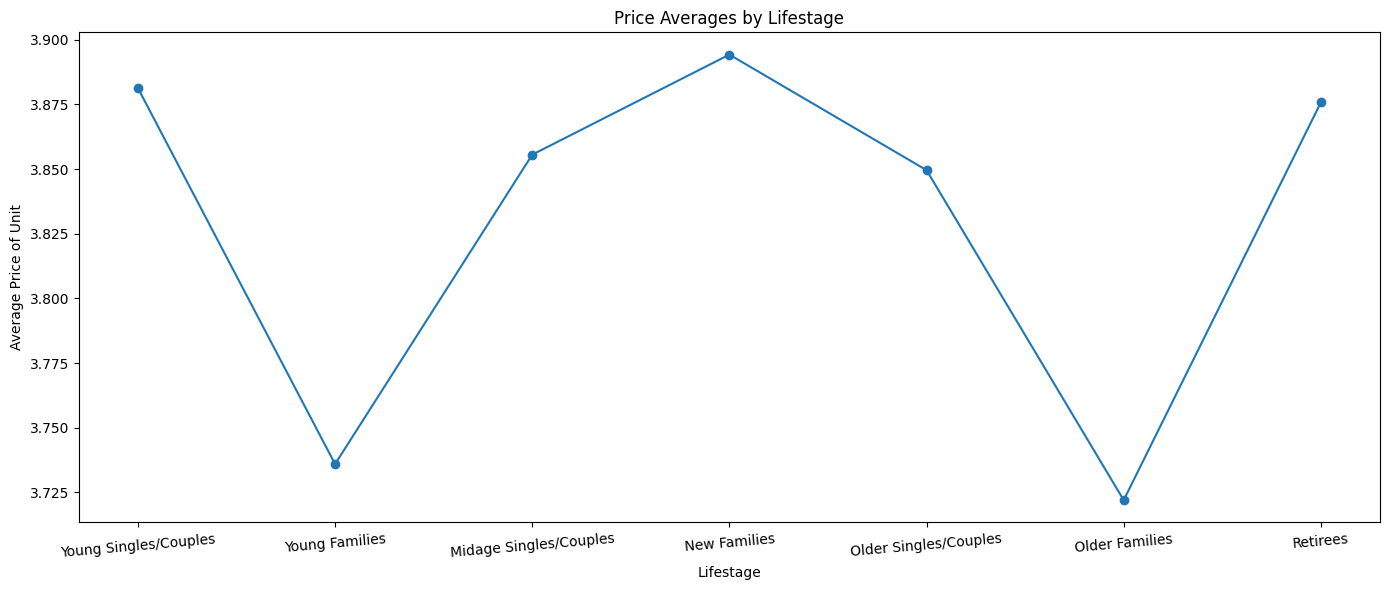

In [39]:
# price averages by life stage
plt.figure(figsize=(14, 6))

plt.plot(princeaverage_lifestage, marker='o')

plt.xticks([0, 1, 2, 3, 4, 5, 6], \
           ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 'New Families', \
            'Older Singles/Couples', 'Older Families', 'Retirees'], \
           rotation=5)
plt.title('Price Averages by Lifestage')
plt.ylabel('Average Price of Unit')
plt.xlabel('Lifestage')

plt.tight_layout()
plt.savefig('Price Averages by Lifestage')
plt.show()

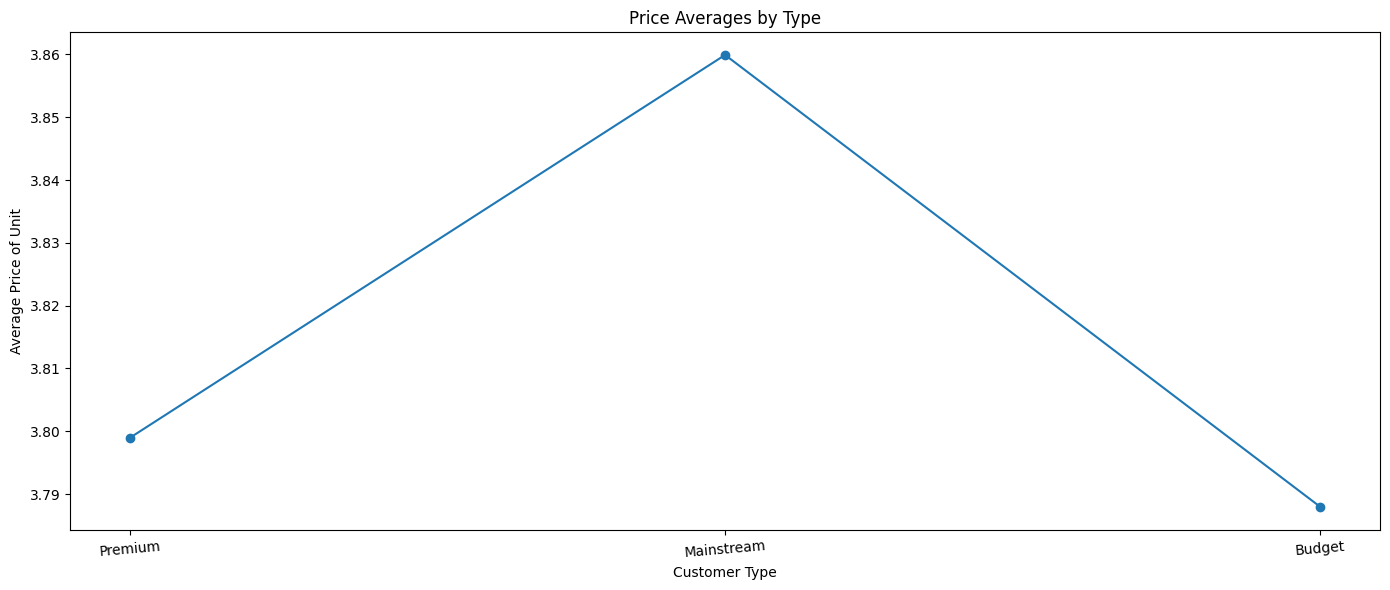

In [40]:
# price averages by customer type
plt.figure(figsize=(14, 6))

plt.plot(priceaverage_type, marker='o')

plt.xticks([0, 1, 2], \
           ['Premium', 'Mainstream', 'Budget'],
           rotation=5)
plt.title('Price Averages by Type')
plt.ylabel('Average Price of Unit')
plt.xlabel('Customer Type')

plt.tight_layout()
plt.savefig('Price Averages by Type')
plt.show()

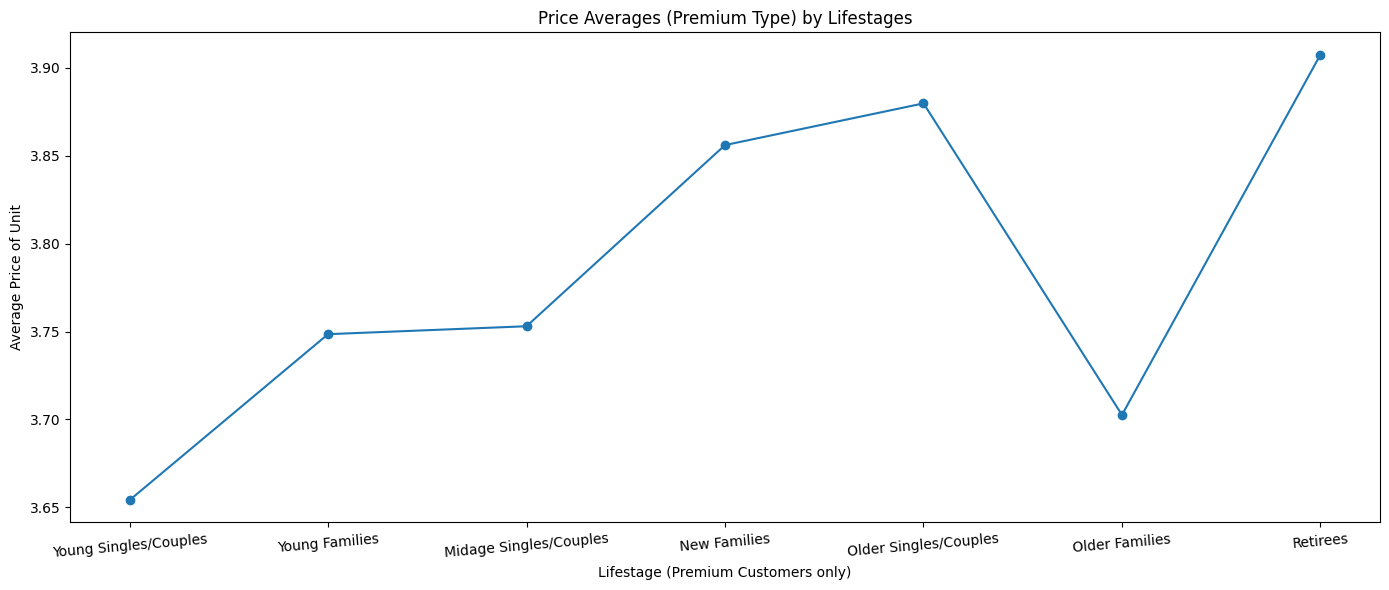

In [41]:
# price averages of premium and each life stage
plt.figure(figsize=(14, 6))

plt.plot(priceaverage_premiumandlifestages, marker='o')

plt.xticks([0, 1, 2, 3, 4, 5, 6], \
           ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 'New Families', \
            'Older Singles/Couples', 'Older Families', 'Retirees'], \
           rotation=5)
plt.title('Price Averages (Premium Type) by Lifestages')
plt.ylabel('Average Price of Unit')
plt.xlabel('Lifestage (Premium Customers only)')

plt.tight_layout()
plt.savefig('Price Averages (Premium Type) by Lifestages')
plt.show()

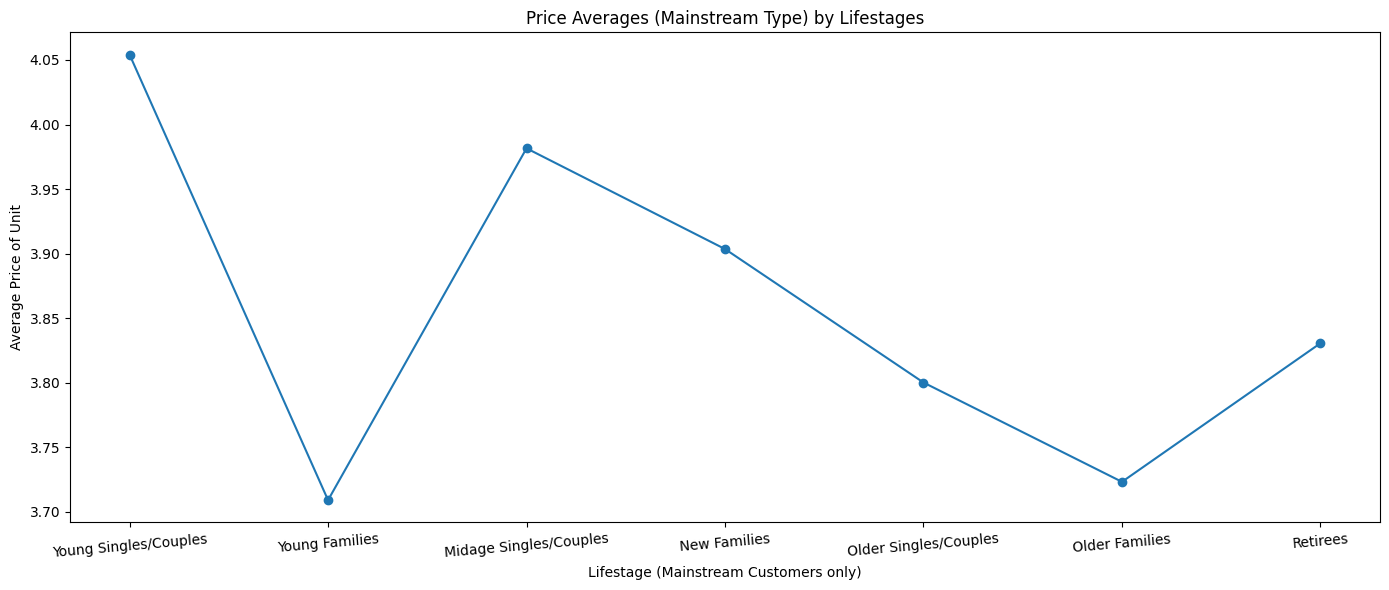

In [42]:
# price averages of mainstream and each life stage
plt.figure(figsize=(14, 6))

plt.plot(priceaverage_mainstreamandlifestage, marker='o')

plt.xticks([0, 1, 2, 3, 4, 5, 6], \
           ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 'New Families', \
            'Older Singles/Couples', 'Older Families', 'Retirees'], \
           rotation=5)
plt.title('Price Averages (Mainstream Type) by Lifestages')
plt.ylabel('Average Price of Unit')
plt.xlabel('Lifestage (Mainstream Customers only)')

plt.tight_layout()
plt.savefig('Price Averages (Mainstream Type) by Lifestages')
plt.show()

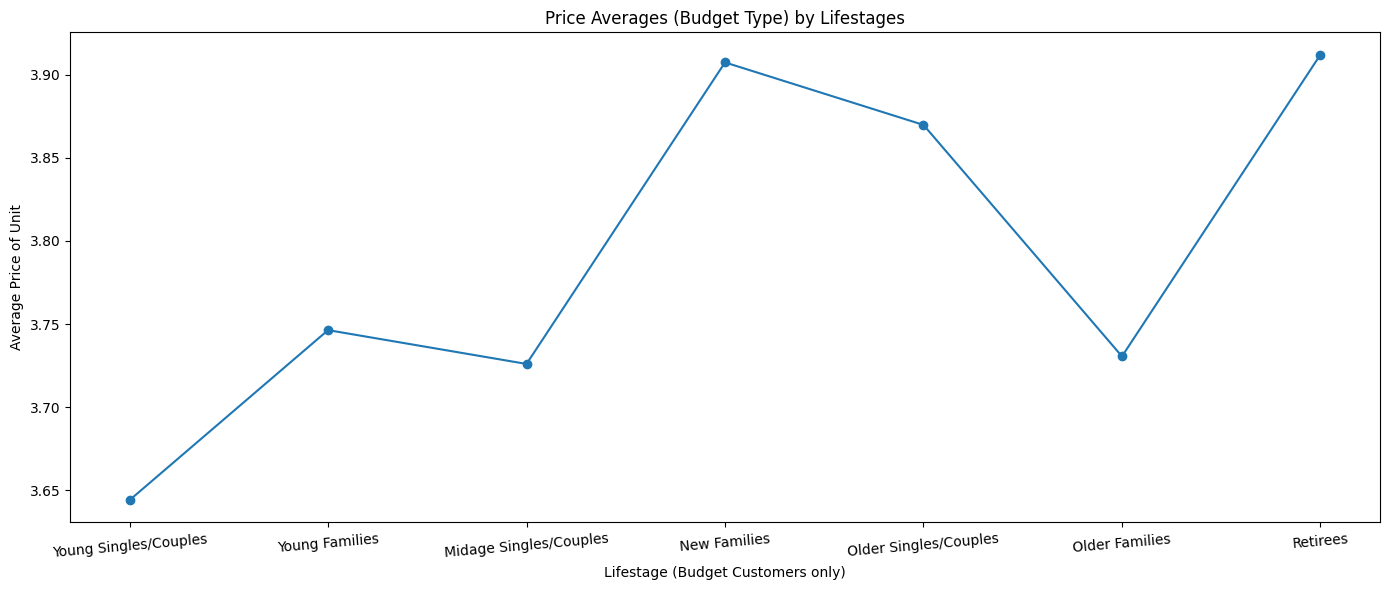

In [43]:
# price averages of budget and each life stage
plt.figure(figsize=(14, 6))

plt.plot(priceaverage_budgetandlifestage, marker='o')

plt.xticks([0, 1, 2, 3, 4, 5, 6], \
           ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 'New Families', \
            'Older Singles/Couples', 'Older Families', 'Retirees'], \
           rotation=5)
plt.title('Price Averages (Budget Type) by Lifestages')
plt.ylabel('Average Price of Unit')
plt.xlabel('Lifestage (Budget Customers only)')

plt.tight_layout()
plt.savefig('Price Averages (Budget Type) by Lifestages')
plt.show()

In [44]:
# filter data to be used for confidence level analysis

# build necessary data frames
df_salesbytypes = df_merged[['TOTAL_SALES', 'PREMIUM_CUSTOMER', 'LIFESTAGE']]

# initialize counts and lists
row_count = len(df_salesbytypes)
row_index = 0

sales_mainstream_youngmidagesinglescouples = []
sales_budget_youngmidagesinglescouples = []
sales_premium_youngmidagesinglescouples = []

# loop through each value in the data
for row in range(row_count):
    # set values from that row
    row = df_customertype.iloc[row_index]
    total_sale = row['TOTAL_SALES']
    customer_type = row['PREMIUM_CUSTOMER']
    customer_age = row['LIFESTAGE']

    # if condition of interest is met, add sale to the corresponding list
    if (customer_age == 'Young Singles/Couples' or customer_age == 'Midage Singles/Couples') and customer_type == 'Mainstream':
        sales_mainstream_youngmidagesinglescouples.append(total_sale)
    elif (customer_age == 'Young Singles/Couples' or customer_age == 'Midage Singles/Couples') and customer_type == 'Budget':
        sales_budget_youngmidagesinglescouples.append(total_sale)
    elif (customer_age == 'Young Singles/Couples' or customer_age == 'Midage Singles/Couples') and customer_type == 'Premium':
        sales_premium_youngmidagesinglescouples.append(total_sale)

    row_index += 1

# display results (counts)
print('Total number of sales for mainstream young+midage singles/couples \n', len(sales_mainstream_youngmidagesinglescouples))
print('Total number of sales for budget young+midage singles/couples \n', len(sales_budget_youngmidagesinglescouples))
print('Total number of sales for premium young+midage singles/couples \n', len(sales_premium_youngmidagesinglescouples))

Total number of sales for mainstream young+midage singles/couples 
 30905
Total number of sales for budget young+midage singles/couples 
 13453
Total number of sales for premium young+midage singles/couples 
 13651


In [45]:
# use the above data to analyze confidence level and if there is statistical significance
from scipy import stats

# mainstream vs budget
t_stat, p_value = stats.ttest_ind(sales_mainstream_youngmidagesinglescouples, sales_budget_youngmidagesinglescouples)

if p_value < 0.05:
    print("Yes. There is a statistical significance (p-value less than 0.05) difference between mainstream young+midage singles/couples and budget young+midage singles/couples.")
else:
    print("No. There is no statistical significance (p-value greater than 0.05) difference between mainstream young+midage singles/couples and budget young+midage singles/couples.")

# mainstream vs premium
t_stat, p_value = stats.ttest_ind(sales_mainstream_youngmidagesinglescouples, sales_premium_youngmidagesinglescouples)

if p_value < 0.05:
    print("Yes. There is a statistical significance (p-value less than 0.05) difference between mainstream young+midage singles/couples and premium young+midage singles/couples.")
else:
    print("No. There is no statistical significance (p-value greater than 0.05) difference between mainstream young+midage singles/couples and premium young+midage singles/couples.")

Yes. There is a statistical significance (p-value less than 0.05) difference between mainstream young+midage singles/couples and budget young+midage singles/couples.
Yes. There is a statistical significance (p-value less than 0.05) difference between mainstream young+midage singles/couples and premium young+midage singles/couples.


In [46]:
# filter through brand data and tally counts if the target consumer is purchasing
df_affinityanalysis_brand = df_merged[['PRODUCT_NAME','PRODUCT_QUANTITY','LIFESTAGE','PREMIUM_CUSTOMER']]

# initialize general counts 
row_count = len(df_affinityanalysis_brand)
row_index = 0
count_purchaseofabrand_mainstream_youngsinglescouples = 0
count_purchaseofabrand_total = 0

# initialize brand counts (if the target customer type is purchasing)
count_naturalchipcompany = 0
count_redrockdeli = 0
count_grainwaves = 0
count_woolworths = 0
count_cheetos = 0
count_infuzions = 0
count_doritos = 0
count_smiths = 0
count_kettle = 0
count_ccs = 0
count_tostitos = 0
count_cobs = 0
count_burgerrings = 0
count_thins = 0
count_tyrrells = 0
count_cheezels = 0
count_twisties = 0
count_sunbites = 0
count_pringles = 0
count_frenchfries = 0

# loop through all values in the data
for row in range(row_count):
    row = df_affinityanalysis_brand.iloc[row_index]

    # initialize the values for each column of that row
    lifestage = row['LIFESTAGE']
    type = row['PREMIUM_CUSTOMER']
    prod_quantity = row['PRODUCT_QUANTITY']
    instances = prod_quantity
    full_prodname = row['PRODUCT_NAME']

     # add the isntance number if the consumer is the right type combo
    if lifestage == 'Young Singles/Couples' and type == 'Mainstream':
        count_purchaseofabrand_mainstream_youngsinglescouples += instances
            
         # increase the instnaces for the brand that is present
        if 'Natural Chip Company' in full_prodname:
            count_naturalchipcompany += instances
    
        elif 'Red Rock Deli' in full_prodname:
            count_redrockdeli += instances
    
        elif 'Grain Waves' in full_prodname:
            count_grainwaves += instances
    
        elif 'WoolWorths' in full_prodname:
            count_woolworths += instances
    
        elif 'Cheetos' in full_prodname:
            count_cheetos += instances
    
        elif 'Infuzions' in full_prodname:
            count_infuzions += instances
    
        elif 'Doritos' in full_prodname or 'Dorito' in full_prodname:
            count_doritos += instances
            
        elif 'Smiths' in full_prodname:
            count_smiths += instances
    
        elif 'CCs' in full_prodname:
            count_ccs += instances
    
        elif 'Tostitos' in full_prodname:
            count_tostitos += instances
    
        elif 'Cobs' in full_prodname:
            count_cobs += instances
    
        elif 'Burger Rings' in full_prodname:
            count_burgerrings += instances
    
        elif 'Thins' in full_prodname:
            count_thins += instances
    
        elif 'Tyrrells' in full_prodname:
            count_tyrrells += instances
    
        elif 'Cheezels' in full_prodname:
            count_cheezels += instances
    
        elif 'Twisties' in full_prodname:
            count_twisties += instances
    
        elif 'SunBites' in full_prodname:
            count_sunbites += instances
    
        elif 'Pringles' in full_prodname:
            count_pringles += instances
    
        elif 'French Fries' in full_prodname:
            count_frenchfries += instances
    
        elif 'Kettle' in full_prodname:
            count_kettle += instances
            
    # add the number of instances to the total
    count_purchaseofabrand_total += instances

    # increase row_index 
    row_index += 1

# check that the sum of all brand counts is equal to the purchase of a brand total
count_sum = count_naturalchipcompany + count_redrockdeli + count_grainwaves + count_woolworths + count_cheetos + count_infuzions + count_doritos + count_smiths + count_kettle + count_ccs + count_tostitos + count_cobs + count_burgerrings + count_thins + count_tyrrells + count_cheezels + count_twisties + count_sunbites + count_pringles + count_frenchfries
print(f'Total instances for a purchase of a brand for the target consumer: \n{count_sum}')

print(count_purchaseofabrand_total)

Total instances for a purchase of a brand for the target consumer: 
36509
475911


In [47]:
# perform affinity analysis on brand data for target consumer
print(f'Below is the affinity anlysis for a given brand and the target consumer. In this case, \nthe target consumer is Mainstream and Young Singles/Couples \
since this group has the highest amount of money spent per unit.\n\nNumber of chip packs purchased for all brands with target consumer = {count_sum}\n')

list_confidencelevels = []

confidence = (count_naturalchipcompany/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Natural Chip Company: {count_naturalchipcompany} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_naturalchipcompany/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_redrockdeli/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Red Rock Deli: {count_redrockdeli} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_redrockdeli/count_purchaseofabrand_total).round(2))*100}%\n")
##
confidence = (count_grainwaves/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Grain Waves: {count_grainwaves} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_grainwaves/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_woolworths/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Woolworths: {count_woolworths} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_woolworths/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_cheetos/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Cheetos: {count_cheetos} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_cheetos/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_infuzions/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Infuzions: {count_infuzions} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_infuzions/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_doritos/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Doritos: {count_doritos} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_doritos/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_smiths/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Smith's: {count_smiths} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_smiths/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_ccs/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"CC's: {count_ccs} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_ccs/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_tostitos/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Tostitos: {count_tostitos} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_tostitos/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_cobs/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Cobs: {count_cobs} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_cobs/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_burgerrings/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Burger Rings: {count_burgerrings} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_burgerrings/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_thins/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Thins: {count_thins} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_thins/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_tyrrells/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Tyrrells: {count_tyrrells} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_tyrrells/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_cheezels/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Cheezels: {count_cheezels} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_cheezels/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_twisties/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Twisties: {count_twisties} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_twisties/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_sunbites/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Sun Bites: {count_sunbites} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_sunbites/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_pringles/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Pringles: {count_pringles} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_pringles/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_frenchfries/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"French Fries: {count_frenchfries} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_frenchfries/count_purchaseofabrand_total).round(2))*100}%\n")

confidence = (count_kettle/count_sum).round(2)
list_confidencelevels.append(confidence)
print(f"Kettle: {count_kettle} total packs purchased \n\
      Confidence = {confidence}\
      Support = {((count_kettle/count_purchaseofabrand_total).round(2))*100}%\n")

Below is the affinity anlysis for a given brand and the target consumer. In this case, 
the target consumer is Mainstream and Young Singles/Couples since this group has the highest amount of money spent per unit.

Number of chip packs purchased for all brands with target consumer = 36509

Natural Chip Company: 710 total packs purchased 
      Confidence = 0.02      Support = 0.0%

Red Rock Deli: 1753 total packs purchased 
      Confidence = 0.05      Support = 0.0%

Grain Waves: 1185 total packs purchased 
      Confidence = 0.03      Support = 0.0%

Woolworths: 873 total packs purchased 
      Confidence = 0.02      Support = 0.0%

Cheetos: 291 total packs purchased 
      Confidence = 0.01      Support = 0.0%

Infuzions: 2343 total packs purchased 
      Confidence = 0.06      Support = 0.0%

Doritos: 4447 total packs purchased 
      Confidence = 0.12      Support = 1.0%

Smith's: 3609 total packs purchased 
      Confidence = 0.1      Support = 1.0%

CC's: 405 total packs purchase

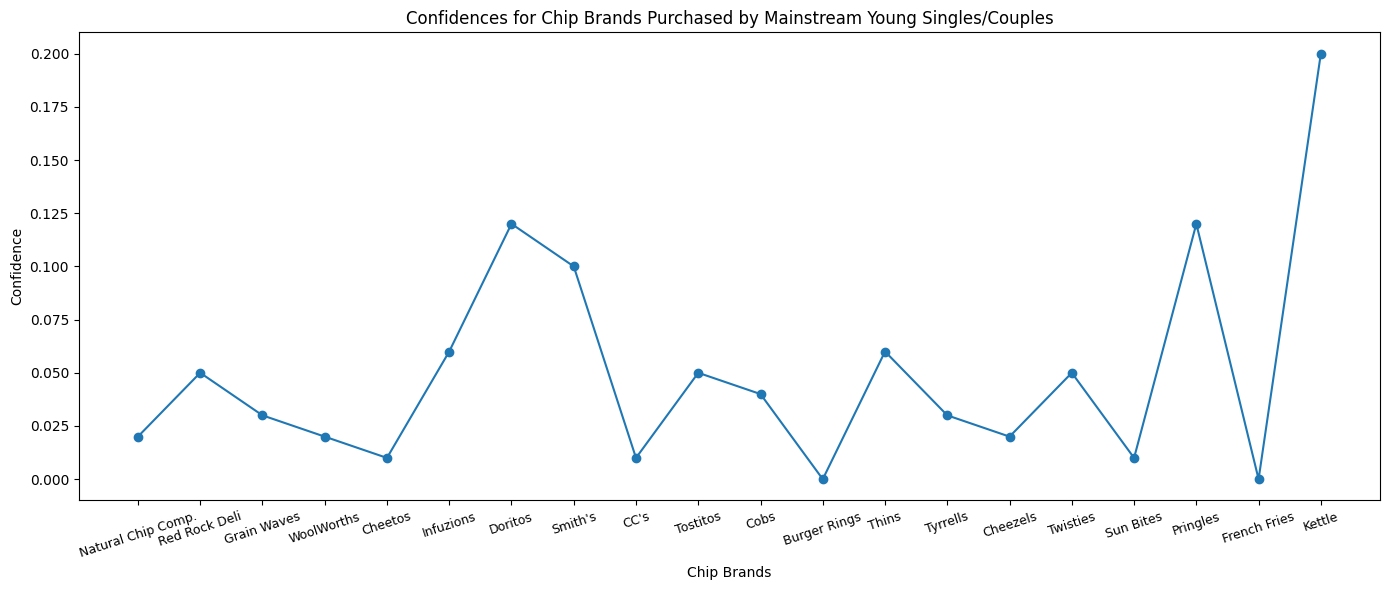

In [48]:
# plot confidence level results
plt.figure(figsize=(14, 6))

plt.plot(list_confidencelevels, marker='o')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], \
           ['Natural Chip Comp.', 'Red Rock Deli', 'Grain Waves', 'WoolWorths', 'Cheetos', \
            'Infuzions', 'Doritos', "Smith's", "CC's", 'Tostitos', 'Cobs', 'Burger Rings', 'Thins', \
            'Tyrrells', 'Cheezels', 'Twisties', 'Sun Bites', 'Pringles', 'French Fries', 'Kettle'], \
           rotation=18, fontsize=9)
plt.title('Confidences for Chip Brands Purchased by Mainstream Young Singles/Couples')
plt.ylabel('Confidence')
plt.xlabel('Chip Brands')

plt.tight_layout()
plt.savefig('Affinity Analysis Brands')
plt.show()

In [49]:
# filter through pack size data and tally counts if the target consumer is purchasing
import re
df_affinityanalysis_brand = df_merged[['PRODUCT_NAME','PRODUCT_QUANTITY','LIFESTAGE','PREMIUM_CUSTOMER']]

# initialize general counts 
row_count = len(df_affinityanalysis_brand)
row_index = 0
count_purchaseofabrand_mainstream_youngsinglescouples = 0
count_totalpacks = 0

# initialize brand counts (if the target customer type is purchasing)
count_70 = 0
count_90 = 0
count_110 = 0
count_125 = 0
count_134 = 0
count_135 = 0
count_150 = 0
count_160 = 0
count_165 = 0
count_170 = 0
count_175 = 0
count_180 = 0
count_190 = 0
count_200 = 0
count_210 = 0
count_220 = 0
count_250 = 0
count_270 = 0
count_330 = 0
count_380 = 0

for row in range(row_count):
    row = df_affinityanalysis_brand.iloc[row_index]

    # initialize the values for each column of that row
    lifestage = row['LIFESTAGE']
    type = row['PREMIUM_CUSTOMER']
    full_prodname = row['PRODUCT_NAME']
    quantity = row['PRODUCT_QUANTITY']
    pack_size = re.findall(r'\d+', full_prodname)

     # add the isntance number if the consumer is the right type combo
    if lifestage == 'Young Singles/Couples' and type == 'Mainstream':
        count_purchaseofabrand_mainstream_youngsinglescouples += instances
            
         # increase the instnaces for the brand that is present
        if '70' in pack_size:
            count_70 += quantity
        
        elif '90' in pack_size:
            count_90 += quantity
    
        elif '110' in pack_size:
            count_110 += quantity
    
        elif '125' in pack_size:
            count_125 += quantity
    
        elif '134' in pack_size:
            count_134 += quantity
    
        elif '135' in pack_size:
            count_135 += quantity
    
        elif '150' in pack_size:
            count_150 += quantity
    
        elif '160' in pack_size:
            count_160 += quantity
    
        elif '165' in pack_size:
            count_165 += quantity
    
        elif '170' in pack_size:
            count_170 += quantity
    
        elif '175' in pack_size:
            count_175 += quantity
    
        elif '180' in pack_size:
            count_180 += quantity
    
        elif '190' in pack_size:
            count_190 += quantity
    
        elif '200' in pack_size:
            count_200 += quantity
    
        elif '210' in pack_size:
            count_210 += quantity
    
        elif '220' in pack_size:
            count_220 += quantity
    
        elif '250' in pack_size:
            count_250 += quantity
    
        elif '270' in pack_size:
            count_270 += quantity
    
        elif '330' in pack_size:
            count_330 += quantity
    
        elif '380' in pack_size:
            count_380 += quantity
                
    # add one to the total
    count_totalpacks += quantity

    # increase row_index 
    row_index += 1

# check that the sum of all brand counts is equal to the purchase of a brand total
#count_sum = count_naturalchipcompany + count_redrockdeli + count_grainwaves + count_woolworths + count_cheetos + count_infuzions + count_doritos + count_smiths + count_kettle + count_ccs + count_tostitos + count_cobs + count_burgerrings + count_thins + count_tyrrells + count_cheezels + count_twisties + count_sunbites + count_pringles + count_frenchfries
#print('Total instances for a purchase of a brand for the target consumer: \n', count_sum)

print(f'Total number of packs: {count_totalpacks}')
count_sum_packsize = count_70 + count_90 + count_110 + count_125 + count_134 + count_135 + count_150 + count_160 + count_165 + count_170 + count_175 + count_180 + count_190 + count_200 + count_210 + count_220 + count_250 + count_270 + count_330 + count_380 
print(f'Sum of counts for Mainstream Young Singles/Couples: {count_sum_packsize}')

Total number of packs: 475911
Sum of counts for Mainstream Young Singles/Couples: 36509


In [50]:
# perform affinity analysis on pack size data for target consumer 
print(f'Below is the affinity anlysis for a given pack size and the target consumer. In this case, \nthe target consumer is Mainstream and Young Singles/Couples \
since this group has the highest amount of money spent per unit.\n\nNumber of chip packs purchased for pack sizes with target consumer = {count_sum_packsize}\n')

list_confidences = []

confidence = round((count_70/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 70g: {count_70} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_70/count_totalpacks),2))*100}%\n")

confidence = round((count_90/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 90g: {count_90} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_90/count_totalpacks),2))*100}%\n")

confidence = round((count_110/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 110g: {count_110} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_110/count_totalpacks),2))*100}%\n")

confidence = round((count_125/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 125g: {count_125} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_125/count_totalpacks),2))*100}%\n")

confidence = round((count_134/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 134g: {count_134} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_134/count_totalpacks),2))*100}%\n")

confidence = round((count_135/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 135g: {count_135} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_135/count_totalpacks),2))*100}%\n")

confidence = round((count_150/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 150g: {count_150} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_150/count_totalpacks),2))*100}%\n")

confidence = round((count_160/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 160g: {count_160} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_160/count_totalpacks),2))*100}%\n")

confidence = round((count_165/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 165g: {count_165} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_165/count_totalpacks),2))*100}%\n")

confidence = round((count_170/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 170g: {count_170} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_170/count_totalpacks),2))*100}%\n")

confidence = round((count_175/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 175g: {count_175} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_175/count_totalpacks),2))*100}%\n")

confidence = round((count_180/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 180g: {count_180} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_180/count_totalpacks),2))*100}%\n")

confidence = round((count_190/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 190g: {count_190} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_190/count_totalpacks),2))*100}%\n")

confidence = round((count_200/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 200g: {count_200} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_200/count_totalpacks),2))*100}%\n")

confidence = round((count_210/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 210g: {count_210} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_210/count_totalpacks),2))*100}%\n")

confidence = round((count_220/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 220g: {count_220} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_220/count_totalpacks),2))*100}%\n")

confidence = round((count_250/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 250g: {count_250} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_250/count_totalpacks),2))*100}%\n")

confidence = round((count_270/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 270g: {count_270} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_270/count_totalpacks),2))*100}%\n")

confidence = round((count_330/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 330g: {count_330} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_330/count_totalpacks),2))*100}%\n")

confidence = round((count_380/count_sum_packsize), 2)
list_confidences.append(confidence)
print(f" 380g: {count_380} total packs purchased (for the target consumer type and life stage)\n\
      Confidence = {confidence}\
      Support = {(round((count_380/count_totalpacks),2))*100}%\n")

Below is the affinity anlysis for a given pack size and the target consumer. In this case, 
the target consumer is Mainstream and Young Singles/Couples since this group has the highest amount of money spent per unit.

Number of chip packs purchased for pack sizes with target consumer = 36509

 70g: 110 total packs purchased (for the target consumer type and life stage)
      Confidence = 0.0      Support = 0.0%

 90g: 230 total packs purchased (for the target consumer type and life stage)
      Confidence = 0.01      Support = 0.0%

 110g: 3850 total packs purchased (for the target consumer type and life stage)
      Confidence = 0.11      Support = 1.0%

 125g: 109 total packs purchased (for the target consumer type and life stage)
      Confidence = 0.0      Support = 0.0%

 134g: 4326 total packs purchased (for the target consumer type and life stage)
      Confidence = 0.12      Support = 1.0%

 135g: 535 total packs purchased (for the target consumer type and life stage)
      Con

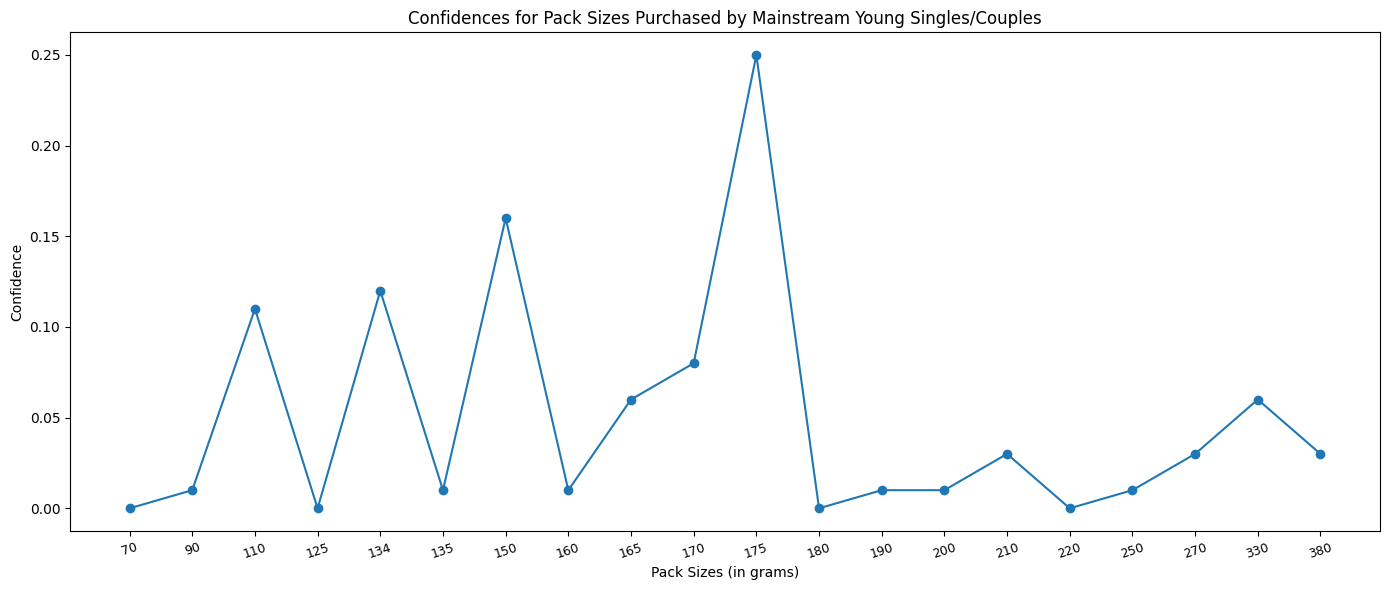

In [51]:
# plot confidence level results
plt.figure(figsize=(14, 6))

plt.plot(list_confidences, marker='o')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], \
           ['70', '90', '110', '125', '134', '135', '150', '160', '165', '170', '175', '180', '190', '200', '210', '220',\
           '250', '270', '330', '380'], \
           rotation=18, fontsize=9)
plt.title('Confidences for Pack Sizes Purchased by Mainstream Young Singles/Couples')
plt.ylabel('Confidence')
plt.xlabel('Pack Sizes (in grams)')

plt.tight_layout()
plt.savefig('Affinity Analysis Pack Size')
plt.show()